<a href="https://colab.research.google.com/github/sanMil2003/APRENDIZAJE_AUTOMATICO_23_24/blob/main/Practica4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Algoritmos Genéticos**

Asignatura: Aprendizaje Automático

Profesor: Carlos Emilio Rabazo Márquez

Grupo: A02

Integrantes: Natalia Iglesias, Sandra Millán y Ángel Pardo



Cargamos instalaciones y librerias a emplear

In [ ]:
!pip install deap
!pip install numpy
!pip install matplotlib
!pip install scipy
!pip install scoop

import random
import math
import numpy as np
from deap import base
from deap import creator
from deap import tools
from deap import algorithms
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import struct

## **Introducción: ¿Por qué usar el algoritmo genético?**
Usar algoritmos genéticos en el aprendizaje automático para encontrar máximos de una función en un dominio específico puede ser una buena idea por varias razones. Una de ellas se trata de la **exploración**. En un algoritmo genético, es importante tener un equilibrio entre exploración y explotación de los datos. Estos algoritmos  son capaces de explorar espacios de búsqueda extensos y complejos. La ventaja de esto se refleja especialmente a la hora de encontrar máximos en funciones que pueden tener varios **óptimos locales**. Además, al utilizar **operadores genéticos** (que se explicarán en detalle más adelante) como la mutación o el cruce, tienen una mayor probabilidad de escapar de mínimos locales y explorar regiones del espacio de búsqueda que otros métodos podrían pasar por alto.

El **objetivo** de esta práctica consiste en determinar el máximo de la función 'picos' mediante el empleo de una optimización metahurística basada en el algoritmo genético. Cuando se habla de un **enfoque metaheurístico**, se trata de usar estrategias  para encontrar soluciones a problemas de optimización, donde se busca encontrar la mejor solución posible dentro de un conjunto de posibles soluciones. Además, a diferencia de los métodos de optimización clásicos, las metaheurísticas no garantizan encontrar la solución óptima, pero son capaces de proporcionar **soluciones aceptables** en un tiempo razonable, incluso para problemas de gran escala o complejidad.

Para comprender la **complejidad del problema**, se recurrirá a la **visualización** de la función "picos". Una vez establecida la expresión matemática que describe la función, se procederá a aplicar el método de Montecarlo. La generación de 1000 puntos en ambos ejes proporcionará una muestra representativa de la función, permitiendo así visualizar su forma y ubicación de los picos.

Es crucial tener en cuenta que las **soluciones** generadas por el algoritmo genético deben ser **válidas**. En este contexto, una solución se consideraría no válida si alguna de las variables independientes se saliera de los rangos establecidos. Este requisito garantiza que las soluciones encontradas sean aplicables al problema y cumplan con las restricciones del dominio de la función 'picos'.


#**1.- Encontrar los máximos de la función "picos"**

$$z = f(x,y) = 3(1-x)^2e^{-(x^2)-(y+1)^2}-10(x/5-x^3-y^5)e^{-x^2-y^2}-1/3e^{-(x+1)^2-y^2}$$

En el dominio: $$\{x,y\} \in [-100,100]$$

En este problema, la cadena cromosomática estaría formada por dos genes (cromosomas), que, al confinarse en forma de lista, quedaría como:

 $$[x_i, y_i]$$ con $$i = 1, 2, ... , n$$

## **Visualización de la función**

Se procede a **visualizar** dicha función. La función objetivo (llamada funcion_prueba), toma un vector z de dos elementos (x e y) y calcula el valor de la función objetivo (res) utilizando la función proporcionada en el enunciado de la práctica. Además, se generan dos vectores x e y que abarcan todo el dominio de -100 a 100 con 1000 puntos equidistantes.

La **función objetivo** (también llamada función de adaptabilidad o de fitness) define el criterio con el que se va a optimizar. Por lo tanto, en este problema que se buscar maximizar la función, el objetivo sería encontrar valores de las variables de decisión que maximicen la función objetivo. A medida que el número de generaciones aumenta, es más probable que la adaptación media se aproxime a la del mejor individuo.

En otras palabras, esta función  asigna un valor numérico a cada posible solución del problema. Este valor, que define la **aptitud del individuo** (de su **fenotipo**), indica cuán "buena" o "mala" es esa solución. De esta forma, a medida que se van aplicando los operadores genéticos, se favorece la selección de aquellos individuos mejor adaptados para a continuación cruzarlos, y mutar los hijos.


In [ ]:
# Fijamos la semilla. Si no cambiamos la semilla,
# la función generará los mismos número aleatorios
random.seed(0)

In [ ]:
# Definimos la función objetivo como función prueba
def funcion_prueba(z):
    # x es x[0] e y es x[1]
    x = z[0]
    y = z[1]
    res = 3*(1-x)**2*math.exp(-(x**2)-(y+1)**2)-10*(x/5-x**3-y**5)*math.exp(-x**2-y**2)-1/3*math.exp(-(x+1)**2-y**2) # FO
    return res

In [ ]:
# Generamos vectores que barran todo el dominio
# Un vector x que abarca todo el dominio entre -100 y 100, con 1000 puntos equidistantes
x = np.linspace(-100, 100, 1000)
y = np.linspace(-100, 100, 1000)
# print('x= ', x)
# print('y= ', y)

In [ ]:
# Evaluamos todos los valores de las variables
# meshgrid --> crea una malla bidimensional a partir de los vectores x e y
x_ax, y_ax = np.meshgrid(x, y)
# combina las coordenadas x e y en la malla en un solo array bidimensional llamado vals
# revel() --> aplanar las matrices bidimensionales
vals = np.c_[x_ax.ravel(), y_ax.ravel()]
# funcion_prueba = función objetivo(FO)
# Esta función evalua la FO en cada punto de la malla vals con coordenadas (x,y)
# Reshape --> reorganiza los resultados de la evaluación en una matriz bidimensional llamamda fx
# con la forma a la lista de valores de la función  en uan matriz bidimensional que corresponde
# a la malla (x_ax, y_ax)
fx = np.reshape([funcion_prueba(val) for val in vals],(1000, 1000))

Text(0.5, 0, 'f(x,y)')

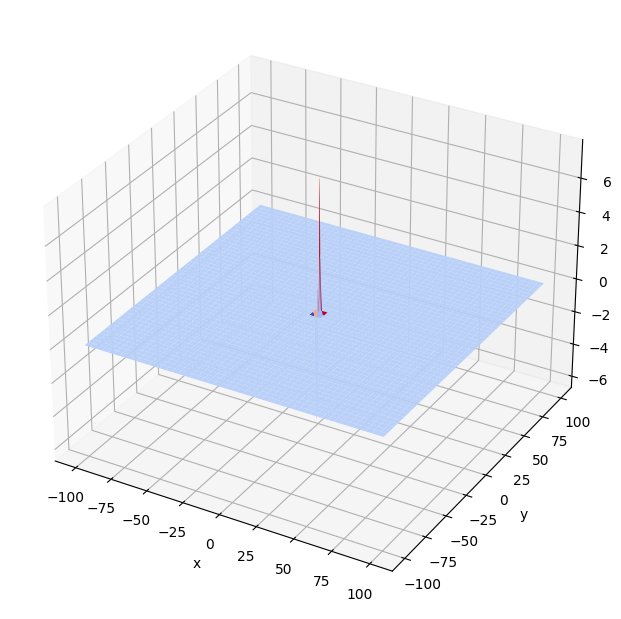

In [ ]:
# Representamos los resultados obtenidos
# Para visualizar la función bidimensional que has evaluado
# en la malla de puntos definida anteriormente, se crea una representación 3D
figure_3d = plt.figure(figsize=(8,6))
# ax = figure_3d.gca(projection="3d")
ax = figure_3d.add_axes(Axes3D(figure_3d))
ax.plot_surface(x_ax, y_ax, fx, cmap=cm.coolwarm)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("f(x,y)")

**Ampliación de la representación**


Gracias a la representación tridimensional de la función, se puede realizar observaciones valiosas sobre la ubicación de sus máximos y mínimos. Notablemente, se han identificado que tanto los máximos como los mínimos se concentran en el centro de la gráfica. Al **expandir y rotar la representación**, se evidencia la presencia de tres picos máximos, de los cuales dos son locales. No obstante, es crucial ejercer precaución, ya que los dos mínimos se encuentran en proximidad.

Al realizar el análisis, se advierte que la gran mayoría de valores tienen valor nulo. Por ende, surge la posibilidad de **optimizar** la representación **ajustando el rango de la función**. Este ajuste no solo facilitará una visualización más precisa de los máximos y mínimos identificados, sino que también permitirá una comprensión más clara de la topología general de la función 'picos'.

In [ ]:
# Generamos vectores que barran todo el dominio
# Un vector x que abarca todo el dominio entre -100 y 100, con 1000 puntos equidistantes
x = np.linspace(-3, 3, 1000)
y = np.linspace(-3, 3, 1000)
# print('x= ', x)
# print('y= ', y)

In [ ]:
# Evaluamos todos los valores de las variables
# meshgrid --> crea una malla bidimensional a partir de los vectores x e y
x_ax, y_ax = np.meshgrid(x, y)
# combina las coordenadas x e y en la malla en un solo array bidimensional llamado vals
# revel() --> aplanar las matrices bidimensionales
vals = np.c_[x_ax.ravel(), y_ax.ravel()]
# funcion_prueba = función objetivo(FO)
# Esta función evalua la FOen cada punto de la malla vals con coordenadas (x,y)
# Reshape --> reorganiza los resultados de la evaluación en una matriz bidimensional llamamda fx
# con la forma a la lista de valores de la función  en uan matriz bidimensional que corresponde
# a la malla (x_ax, y_ax)
fx = np.reshape([funcion_prueba(val) for val in vals],(1000, 1000))

Text(0.5, 0, 'f(x,y)')

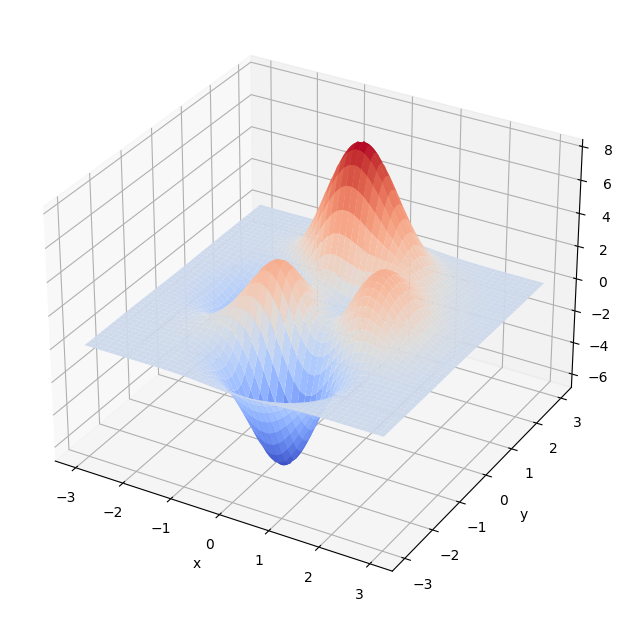

In [ ]:
# Representamos los resultados obtenidos
# Para visualizar la función bidimensional que has evaluado
# en la malla de puntos definida anteriormente, se crea una representación 3D
figure_3d = plt.figure(figsize=(8,6))
# ax = figure_3d.gca(projection="3d")
ax = figure_3d.add_axes(Axes3D(figure_3d))
ax.plot_surface(x_ax, y_ax, fx, cmap=cm.coolwarm)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("f(x,y)")

Antes de comenzar con el problema, se va a visualizar la función desde diferentes perspectivas, de forma que se pueda saber aproximadamente el valor que deberíamos obtener para los máximos.

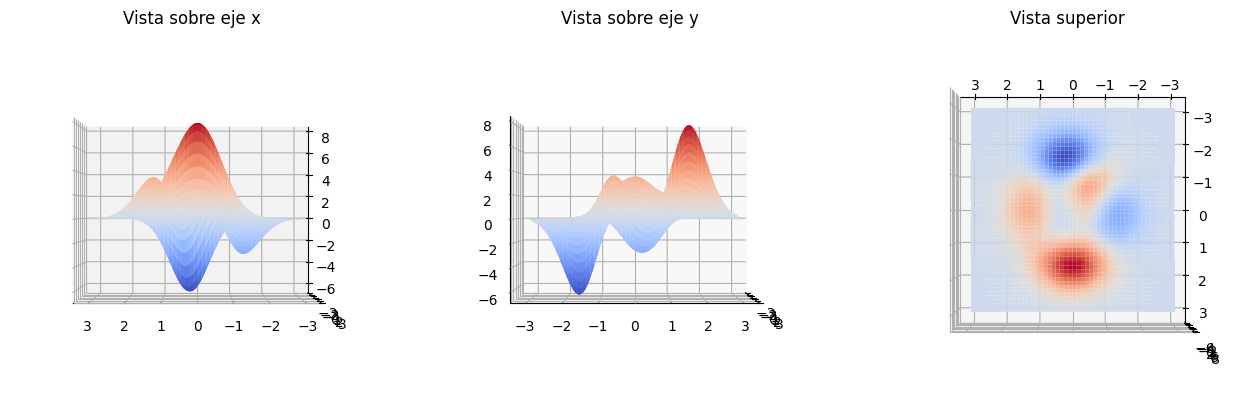

In [ ]:
# Supongamos que tienes definidos x_ax, y_ax y fx

# Crear la figura y los subgráficos
fig, axs = plt.subplots(1, 3, figsize=(16, 6), subplot_kw={'projection': '3d'})

# Primer gráfico
axs[0].plot_surface(x_ax, y_ax, fx, cmap=cm.coolwarm)
axs[0].view_init(elev=0, azim=90)
axs[0].set_title('Vista sobre eje x')

# Segundo gráfico
axs[1].plot_surface(x_ax, y_ax, fx, cmap=cm.coolwarm)
axs[1].view_init(elev=0, azim=0)
axs[1].set_title('Vista sobre eje y')

# Tercer gráfico
axs[2].plot_surface(x_ax, y_ax, fx, cmap=cm.coolwarm)
axs[2].view_init(elev=90, azim=90)
axs[2].set_title('Vista superior')

# Mostrar la figura
plt.show()

**Máximos aproximados**

Los máximos se encuentran aproximadamente en los puntos

|Máximos|x|y|z|
|-|-|-|-|
|1|0.0001|1.58|8.1054|
|2|1.3|0|3.5907|
|3|-0.41|-0.6|3.75039|

## **Creación del algoritmo genético**

Para crear el algoritmo genético, se llevan a cabo los siguientes pasos:
1. Definición del problema y generación de la población inicial

  1.1 Creación del problema

  1.2 Creación de la plantilla del individuo

  1.3 Crear individuos aleatorios y población inicial


2. Función objetivo
3. Operadores genéticos

  3.1 Operador de cruce

  3.2 Operador de mutación

4. Definición de la selección

5. Últimos pasos: Algortimo Evolutivo Simple

  5.1 Resultados del algoritmo genético
  
6. Comparación con otros modelos creados
  
  6.1 Un punto de corte vs Dos puntos de corte
  
  6.2 Pruebas realizadas


In [ ]:
random.seed(0)

###**1. Definición del problema y generación de la población inicial**

####**1.1 Creación del problema**



Para abordar este problema de optimización, es fundamental definir tres elementos clave.

En primer lugar, es necesario establecer el **rango** dentro del cual se buscarán los puntos de interés. Este intervalo determinará la **región** en la que se llevará a cabo la optimización. En este caso, la visualización nos ha permitido conocer el rango de búsqueda óptimo que limitaremos a -5 y 5.

En segundo lugar, es fundamental **identificar** si los puntos de interés que buscamos son **máximos o mínimos**. Esta información orienta la dirección de la optimización. En el contexto de algoritmos genéticos, se refleja en la formulación de la función fitness. Si se busca un máximo, la función fitness podría asignar un peso positivo; si se busca un mínimo, se asignaría un peso negativo. Esta elección guía a la población hacia la convergencia deseada y define la mejora en cada generación.

Finalmente, el tercer componente clave es la formulación de la **función objetivo**. Esta función representa la **métrica** que queremos **optimizar** dentro del rango establecido. Este punto será abordado en el apartado 2.

In [ ]:
# Datos del rango escogido [a,b]
a = -5
b = 5

In [ ]:
# Utilizando la función deep se crea un tipo de clase llamado FitnessMax
# base.Fitness --> contiene un atributo llamado wegths
# La clase Fitness proporciona funcionalidades básicas para representar
# la aptitud (fitness) de un individuo en un algoritmo evolutivo
# Especifíca los pesos asociados, a cada objeto se le asigna un peso 1.0 +positivo
# Este peso indica que estamos tratando de maximizar el valor de la función de aptitud.

creator.create("FitnessMax", base.Fitness, weights=(1.0,))

####**1.2 Creación de la plantilla del individuo**

El siguiente paso en la implementación de un algoritmo genético es la **creación de individuos**, los cuales son representaciones de posibles soluciones al problema de optimización.

Para crear un individuo es esencial **generar sus genes** dentro del rango especificado y en el formato "lista" especificado para garantizar su correcto almacenamiento. Los genes, que representan las coordenadas genéticas del individuo, deben ajustarse a los límites predefinidos para mantener la coherencia con el espacio de búsqueda deseado. Estos genes representan las coordenadas genéticas que definen la solución potencial.

La **estructura de lista** se utiliza para organizar de manera eficiente las coordenadas genéticas y sus correspondientes valores de fitness. Cada individuo en la población tiene asociado un **atributo de fitness**. Este atributo almacena la calidad o el desempeño del individuo con respecto a la función objetivo del problema. La evaluación del fitness se realiza utilizando la función objetivo que se definió en etapas anteriores. Además, cada elemento de la lista corresponde a una dimensión en el espacio de búsqueda.

Para mantener la coherencia con el espacio de búsqueda deseado, es crucial ajustar los genes a los límites predefinidos. Si un gen se encuentra fuera del rango establecido, se ajustará su valor de fitness a -10, penalizando y garantizando que las soluciones generadas sean válidas y respeten las restricciones del problema.

In [ ]:
# Crea un nuevo tipo de clase llamado 'Individual'
# Los individuos serán listas
# Especifica que los individuos de esta clase tendrán asociado un objeto de
# tipo "FitnessMax", que has definido previamente. Este objeto de fitness
# determina cómo se evalúa la aptitud (fitness) de un individuo en el contexto
# de un algoritmo evolutivo de maximización.
creator.create("Individual", list, fitness=creator.FitnessMax)

In [ ]:
# Crea una instancia de la clase Toolbox en el módulo deap. Un Toolbox es
# una caja de herramientas que se utiliza para organizar los operadores genéticos
# (como selección, cruzamiento, mutación) y otros componentes necesarios
# para ejecutar un algoritmo evolutivo.

toolbox = base.Toolbox()

In [ ]:
# Generación de genes (fenotipo dentro del rango)
# toolbox.register(función, aleatorios, restricciones)
toolbox.register("attr_uniform", random.uniform, a, b)

In [ ]:
# Probamos y vemos que generamos un número leatorio entre -100 y 100 distinto cada vez
toolbox.attr_uniform()

3.4442185152504816

####**1.3 Creación de individuos aleatorios y población inicial**


Al crear la población a partir del formato de individuo definido, es crucial considerar el tamaño óptimo de la población. Cada individuo, representado por su **fenotipo** es un vector formado por dos números de tipo float donde cada uno muestra las coordenadas del punto. La representación del **genotipo** tiene formato binario, que ocupa 128 bits, distribuidos en 64 bits para la coordenada del eje X y 64 bits para la coordenada del eje Y. Se establece que el **número óptimo de individuos en la población se encuentra entre L y 2L**.

Mantener el tamaño de la población dentro de este rango es esencial. Un número **inferior** podría resultar insuficiente para explorar de manera efectiva el espacio de búsqueda, mientras que un número **superior**, aunque no presente inconvenientes computacionales en este caso, podría generar un costo excesivo. En este contexto, seleccionar un número óptimo de individuos permite equilibrar la exploración del espacio de búsqueda y la eficiencia computacional.

In [ ]:
# Generación de inviduos
# toolbox.register(función , función n veces, tipo de dato, función que genera, número de repe)
toolbox.register("individual", tools.initRepeat, creator.Individual,
                 toolbox.attr_uniform, 2)

In [ ]:
# Ejemplo de la generación de un individuo aleatorio
individuo = toolbox.individual()
individuo

[2.5795440294030243, -0.79428419169155]

In [ ]:
# El individuo es una lista que tiene un atributo fitness
# donde se almacena la calidad del mismo, que al principio será
# vacío, porque aun no ha sido evaluado
individuo.fitness.values

()

Número de bits usados:
Cada elemento usa 64 bits, pero se tiene dos elementos. Por tanto, cada individuo tiene 128 bits

In [ ]:
print(individuo[0])

c = individuo[0]

# Convertir el número float a formato binario
binary_representation = format(struct.unpack('!Q', struct.pack('!d', c))[0], '064b')

# Contar la longitud de la cadena binaria
print(len(binary_representation))

2.5795440294030243
64


Se genera la población, desde la cual se puede modificar el número de individuos para poder realizar las pruebas necesarias que se explicarán posteriormente.

In [ ]:
# Generación de población
# toolbox.register(función , función n veces, tipo de dato, función que genera, número de repe)

toolbox.register("population", tools.initRepeat, list, toolbox.individual, 256)
# toolbox.register("population", tools.initRepeat, list, toolbox.individual)

In [ ]:
# Ejemplo de creación de una población. Se ve que es
# una lista de 256 filas (una por cada individuo)
poblacion = toolbox.population()
print(poblacion)

[[-2.4108324970703663, 0.11274721368608542], [-0.9506586254958567, 2.837985890347726], [-1.9668727392107255, -0.23403045847644144], [0.8338203945503118, 4.081128851953352], [0.046868558173902564, -2.1816215560029617], [2.5580420415722394, 1.1836899667533167], [-2.4949365863755943, 4.097462559682402], [4.827854760376532, 3.102172359965895], [4.021659504395828, -1.8985243068066735], [2.298317482601286, 3.9883828796799357], [1.8398393191544127, -0.2785728454728664], [-3.992987919316342, -0.6582816454621634], [1.1088697344380165, 4.130110532378982], [4.666063677707587, -0.22990223447282965], [3.6530992777164, -2.395076896080406], [3.0502782701302227, 0.4869930383558927], [-4.8595829983598104, 2.1970468640395415], [-1.0117645777573125, 3.2484497714823295], [1.6815320123185087, -4.988571806855717], [-0.06422133534675378, 3.6760277549278086], [-2.5608912311286804, -1.7479563725260991], [3.7047123210865465, -3.089329084976095], [0.6751074062067186, -2.6138407138477984], [4.675402502901434, 3.0

In [ ]:
# Cada individuo tiene 2 componentes
poblacion[0]

[-2.4108324970703663, 0.11274721368608542]

In [ ]:
# Está destinada a acceder a los valores de aptitud (fitness) del
# primer individuo en una población. Ahora vacia no se ha creado nada.
poblacion[0].fitness.values

()

###**2. Función Objetivo o Fitness**


La función objetivo "picos" es computacionalmente compleja debido a la presencia de exponentes y potencias con operadores numéricos y al ser una **función de tres variables**: z - variable dependiente, x e y - variables independientes; lo que hace costoso calcular su primera y segunda derivada y encontrar los puntos críticos.

La implementación de algoritmos genéticos resulta beneficiosa en este escenario, ya que proporciona una aproximación eficiente, debido a características ya mencionadas como la adaptación (mejora de los valores de cada individuo de manera metaheurística a través del equilibro entre la exploración y la explotación), ajustando los hiperparámetros y los operadores genéticos


Una opción para obtener la **selección óptima** es emplear la función de fitness. Sin embargo, si se tiene un superindividuo, se puede dar el caso en que el algoritmo elija constantemente a ese individuo, a pesar de que puede no ser el mejor adaptado. Para evitar que esto ocurra, se suele realizar la selección mediante el **rango** en vez del fitness, lo que hace que sea **invariante al cambio de tralación y al cambio de escala**. Es decir, con el rango será más uniforme y se evitará una convergencia demasiado rápida que pueda llevar al error. Usar el rango implica ordenar la población según la aptitud de los individuos. Los rangos se asignan en orden ascendente, de modo que el individuo más apto tiene el rango de mayor valor en nuestro caso de maximizar. En caso de minimización, el orden sería al revés. De esta forma se evita la formación de superindividuos al introducir variabilidad. Sin embargo, sigue teniendo una serie de desventajas e inconvenientes como la sensibilidad al tamaño de la población, tanto en poblaciones muy pequeñas donde la variabilidad de los valores de aptitud puede no ser suficiente, como en poblaciones muy grandes donde la exploración no se puede dar de forma genérica, ya que la probabilidad de un individuo mal adaptado es prácticamente nula en comparación con los mejores adaptados. Por otro lado, los individuos que son muy buenos pueden no ser explotados de la forma más efectiva, ya que no hay un cambio significativo entre el rango del mejor individuo y el segundo mejor, el segundo con el tercero, etc. Por último, la implementación de la selección proporcional al rango a menudo requiere ordenar la población según sus valores de aptitud, lo que puede ser computacionalmente costoso en grandes poblaciones. Por ello, se ha optado por utilizar la selección por torneo que se explicará más adelante.

Cuando tarda mucho en encontrar una solución óptima debido a la carencia de diversidad genética, otra opción habitual es la **penalización en función de la distancia de Hamming**. La distancia de Hamming entre dos individuos es el número de posiciones en las que los bits difieren. Aquellos individuos que están cercanos entre sí verán devaluada la probabilidad de ser seleccionados como padres, aumentándose la probabilidad de los individuos que se encuentran más aislados. Además, cuanto más cerca estén, más se penaliza, sumando por último todas las penalizaciones de los individuos para con ese valor **penalizar el valor de la función de fitness**. No obstante, tiene una serie de incovenientes y/o desventajas que nos llevarán a la elección de la penalización únicamente cuando se salen del rango deseado que será la implementación del valor máximo que puede tomar la función objetivo cuando se minimiza y el valor mínimo cuando se maximiza.
Algunas desventajas son: la pérdida de información, dos soluciones pueden tener la misma distancia de Hamming, pero las diferencias en ciertos bits pueden ser más críticas que en otros. Esto puede llevar a una pérdida de información sobre la importancia relativa de las discrepancias, incrementándose teniendo en cuanta que los mínimos y máximos están muy próximos. La escalabilidad, a medida que la longitud del genoma aumenta (128 bits), la distancia de Hamming puede volverse menos efectiva para capturar las diferencias significativas entre soluciones. La distancia de Hamming trata cada posición del genoma de manera independiente. No tiene en cuenta las posibles interacciones entre genes, lo que es crucial en problemas como la función de "picos" donde la relación entre las variables es compleja.

In [ ]:
# Función objetivo
# Itera sobre todos los elementos de la lista
# Si se encuetra fuera del rango se penaliza con FO = -1
# SI está dentro se calcula el fitnesss o aptitud

# Definimos la función objetivo como función prueba
def funcion_objetivo(z):
    """
    Función objetivo de nuestro problema
    """
    for i in range(len(z)):
        if z[i] > b or z[i] < a:
            return -10,
    x = z[0]
    y = z[1]
    res = 3*(1-x)**2*math.exp(-(x**2)-(y+1)**2)-10*(x/5-x**3-y**5)*math.exp(-x**2-y**2)-1/3*math.exp(-(x+1)**2-y**2) # FO
    return res,

In [ ]:
# Función objetivo
# toolbox.register(función, función que utiliza)
toolbox.register("evaluate", funcion_objetivo)

In [ ]:
# Ejemplo de uso 1, es coherente si vemos la gráfica anterior todos los valores suelen ser 0
funcion_objetivo(individuo)

(0.1212524514973247,)

In [ ]:
# Ejemplo de uso 2
toolbox.evaluate(individuo)

(0.1212524514973247,)

###**3. Operadores genéticos**



####**3.1 Operador de Cruce**

El operador de cruce, también conocido como operador de recombinación o crossover, es uno de los operadores genéticos fundamentales en un algoritmo genético. Este operador simula el proceso de **recombinación genética** que ocurre en la reproducción biológica y se utiliza para crear nuevas soluciones a partir de las soluciones existentes en una población

**Cruce Blend**

El operador genético se basa en la idea de mezclar suavemente los genotipos de dos padres para crear descendencia. Está diseñado para crear descendientes en una región más amplia que el rectángulo n-dimensional definido por los padres.

Para cada variable, dados dos padres
$$ padre_{1}[i] < padre_{2}[i]$$
Se estima un número uniforme $$u\in [0,1]$$
Se calcula $$ \gamma = (1 -2\alpha)·u - \alpha $$

Cada gen de la descendencia se elige mediante una combinación lineal de los valores correspondientes en los genotipos de los padres.


$$ descendencia[i] = (1-\gamma) · padre_{1}[i] + \gamma · padre_{2} [i]$$

El rango para la descendencia[i] es
$$descendencia[i] \in [padre_{1}[i] - \alpha·diferencia[i], padre_{2}[i] + \alpha·diferencia[i]]$$
Donde la diferencia[i] es
$$diferencia[i] =  padre_{2}[i] - padre_{1} [i]$$

Componentes:
*   descendencia[i] es el valor del i-ésimo gen en la descendencia.
*   padre1[i] y padre2[i] son los valores correspondientes en el i-ésimo gen de los padres

*   α es un parámetro llamado "factor de mezcla" que controla la cantidad de mezcla. Si α = 0.5, la mezcla es uniforme, es decir, se equilibra la exploración y la explotación.

Al final este tipo de cruce proporciona 3 ventajas:
1. **Exploración y Explotación equilibradas:** permite una exploración equilibrada y explotación del espacio de búsqueda. Al ajustar el parámetro alpha, se puede controlar la proporción de explotación y exploración en el proceso de cruce.

2. **Exploración en zonas Cercanas a los óptimos**: dado que la función tiene máximos y mínimos cercanos, el cruce blend puede ayudar a explorar regiones cercanas a los óptimos locales. Esto es crucial para evitar la convergencia prematura y descubrir soluciones en vecindarios estrechos.

3. **Adaptabilidad a la forma de la Función Objetivo:** el cruce blend no asume una forma específica para la función objetivo, lo que lo hace más adaptable a la complejidad de la función "picos". Puede ajustarse a la forma específica de la función, facilitando la adaptación a variaciones en la topología del espacio de búsqueda



In [ ]:
# Registrar la operación gnética de cruce por un punto
# toolbox.register(función, función tipo de cruce)
toolbox.register("mate", tools.cxBlend, alpha=0.5)

####**3.2 Operador de mutación**

**Mutación de Bit Uniforme**

La mutación es un operador genético crucial en algoritmos genéticos que introduce variabilidad genética en la población, permitiendo la exploración de nuevas soluciones.

La **mutación de bit uniforme** es un tipo específico de mutación diseñada para individuos representados con **genotipos binarios**; es decir, con secuencias de bits, donde cada bit puede ser 0 o 1.

Cada bit en la secuencia tiene una **probabilidad** independiente de **invertirse** (cambiar de 0 a 1 o viceversa). La probabilidad de mutación se controla mediante el parámetro **indpb**, que representa la **probabilidad de mutar** un gen de un individuo. Para cada bit en la secuencia, se genera un número aleatorio entre 0 y 1. Si este número es menor que la probabilidad indpb, se realiza la mutación en ese bit. En otras palabras, si la
probabilidad generada es menor que indpb, el bit se invierte, lo cual introduce variabilidad facilitando así la exploración de otras posibles soluciones.

La probabilidad indpb actúa como un **control** sobre la **tasa de mutación**. En este caso, indpb es 0.05, lo cual significa que, en promedio, se espera que el **5% de los bits se muten** en cada aplicación de la mutación.

Este concepto se profundizará en más detalle en el segundo ejercicio.


Por tanto, la mutación de Bit Uniforme es beneficiosa teniendo en cuenta las características de nuestro problema:

1. **Exploración del espacio de búsqueda:** La mutación de bit uniforme permite explorar el espacio de búsqueda de manera más uniforme. Cambiando aleatoriamente los bits, se pueden generar soluciones nuevas y diversas, lo que es útil para evitar quedarse estancado en óptimos locales y buscar soluciones más globales (evita la convergencia prematura).

2. **Exploración Local Controlada:** La mutación de bit uniforme puede introducir pequeñas perturbaciones en los individuos, permitiendo una exploración local controlada alrededor de soluciones prometedoras. Esto es beneficioso cuando los máximos y mínimos de la función están cercanos, ya que ayuda a buscar soluciones en vecindarios inmediatos.

3. **Introducción de variabilidad:** La mutación de bit uniforme introduce variabilidad en la población, lo que puede ser útil para evitar la pérdida de información genética útil. Esto es especialmente importante en problemas complejos donde puede haber múltiples soluciones óptimas o subóptimas, que pueden estar próximas como en este problema.

4. **Adaptación a Representaciones Binarias:** al utilizar un genotipo con representación binaria para las soluciones, la mutación de bit uniforme es natural y se ajusta bien a este esquema. Podemos controlar la tasa de mutación para equilibrar la exploración y explotación.

In [ ]:
# Registra la operación gnética de mutación
# Distribución normal
# mu = 0 --> media
# sigma = 5 --> desviación estándar
# indpb = 0.1 --> probabilidad de mutar el gen de un individuo (cntrol de cuantos se mutan)
# Si la prob generada es menor de 0.1 se muta (10%)
# toolbox.register(función, distribución, media, desviación, prob.mutación)

# toolbox.register("mutate", tools.mutFlipBit, indpb=0.15)
toolbox.register("mutate", tools.mutFlipBit, indpb=0.05)

###**4. Definición de la selección**


La **selección por torneo** es un método comúnmente utilizado en algoritmos genéticos para elegir individuos de una población para la reproducción. Este método involucra la creación de "torneos" entre un pequeño número de individuos seleccionados al **azar** de la poblaciónn que normalmente suele ser 2 o 3. La elección del tamaño del torneo afecta a la selcción, pues torneos más grandes favorecen a los individuos más aptos.

Se escogen al azar individuos de la población para participar en el torneo. Este proceso se puede realizar con o sin reemplazo. En esta práctica se hará **con remplazo**, lo que significa que un individuo seleccionado sí puede participar en más de un torneo en la misma iteración.

Los individuos seleccionados participan en un torneo, y se evalúa su aptitud utilizando la función fitness. El individuo con la aptitud más alta dentro del torneo se selecciona como el **ganador**.

Este proceso de selección por torneo **se repite hasta** que se haya seleccionado el número necesario de individuos para **completar la nueva generación**. En cada iteración, se forman torneos independientes y se selecciona un ganador de cada torneo. La cantidad de individuos seleccionados mediante torneos debe coincidir con el tamaño deseado de la población para la siguiente generación. Por lo tanto, se realizan tantos torneos como sea necesario hasta alcanzar este número.

Además, este método es eficiente al no tener que ordenar toda la población, garantizando la diversidad y la evolución de la población a lo largo de las generaciones. Por tanto, es la mejor elección teniendo en cuenta los inconvenientes de las otras opciones comúnmente utilizadas.

In [ ]:
# Selección mediante torneo
# La selección de individuos es con remplazo
# toolbox.register(función, tipo de selección (torneo), cantidad de individuos en el torneo)

toolbox.register("select", tools.selTournament, tournsize=3)

###**5. Últimos pasos: Algoritmo Evolutivo Simple**

Como último paso en la elaboración de nuestro algoritmo es la selección de las variables CXPB, MUTPB, NGEN. Estas tres variables se corresponden con la **Probabilidad de cruce**, la **Probabilidad de mutación**, y el **número de generaciones** a llevar a cabo . Estos conceptos consisten en lo siguiente:
* Probabilidad de Cruce: *Indica la posibilidad de que una pareja pueda llevar a cabo el cruce, esto es, realizar el proceso de recombinación genética del genotipo de ambos padres en la pareja. La probabilidad de cruce es un parametro que se centra en la capacidad de exploración del algoritmo.*
* Probabilidad de Mutación: *Indica la posibilidad global de que un individuo en la generación experimente una mutación en cada generación. De esta manera, este parámetro determina una aproximación del porcentaje de individuos que mutarán por generación.La probabilidad de mutación es un parámetro que se centra en la capacidad de explotación del algoritmo.*
* Número de generaciones: *Es el número de veces que se aplicará el algoritmo sobre la población, realizando cambios en esta mediante cruces y mutaciones. El número de generaciones busca alcanzar el punto algido en el que el algoritmo nos da el resultado óptimo al problema. Cada generación hecha de más es un coste computacional, por lo que nos interesa obtener el resultado óptimo en el menor número de generaciones posibles.*

Una vez conociendo este concepto elegimos mediante pruebas heurísticas los parámetros óptimos para solucionar nuestro problema, estos resultados son los siguientes:
* Probabilidad de Cruce de 0.3. Es una probabildidad no muy elevada (<0.5) la cual se debe principalmente a que no es interesante en este caso realizar una exploración demasiado elevada, debido a que los máximos y mínimos existentes no son demasiados como se observó gráficamente.
* Probabilidad de Mutación de 0.125. Es una probabilidad no muy elevada (<0.2) cambiando los genes de prácticamente un décimo de la población. Esto lo que nos permite es tener una explotación adecuada sobre los máximos que poseemos, debido a que si se tuviera una explotación más elevada podría provocar que nos atascasemos en un máximo relativo.
* Número de generaciones es de 20. Un número no muy elevado y que acarrea poco coste computacional y que nos permitirá ver si tenemos un algoritmo eficiente en pocas generaciones.

In [ ]:
# Definimos:
#  CXPB: Probabilidad de Cruce
#  MUTPB: Probabilidad de Mutación
#  NGEN: Número de Generaciones
# Los valores son de prueba para obtener unos resultados preeliminares
CXPB, MUTPB, NGEN = 0.3, 0.125, 20

Se genera la población inicial con la que trabajará el algoritmo, que estará formada por 256 individuos. Cada individuo poseerá dos coordenadas, cada cual correspondiente al valor de la *x* y al valor de la *y*

In [ ]:
#Generamos la Población Inicial
# pop = toolbox.population()
pop = toolbox.population()
pop

[[1.0484823758053103, 3.5917560861920883],
 [-3.130082975771422, -3.8760896416981594],
 [-1.5555039266138913, 4.591715206073138],
 [-3.6984230557131594, 4.665192604669938],
 [-1.3776013005515075, -0.2662959723988845],
 [-2.0736801403502647, 4.3712684421546975],
 [4.581478949874976, 1.3591570650774347],
 [-3.1595444982484446, 4.929517886102872],
 [-3.9741956045308804, 0.8084938159408042],
 [-3.4359693991699123, 3.9767531415020567],
 [4.4567839149561514, 3.0439029800010786],
 [-1.841085813318756, -2.571613100420148],
 [2.5485841321903777, -2.08940480854646],
 [-0.802146221459247, -4.537443230973587],
 [-3.6776618956619345, -4.794503793582233],
 [-4.220788799064642, -4.267888506351392],
 [-0.797682978258532, 0.5077717763743781],
 [2.4087881987092192, -3.57716526157584],
 [-0.7781125383058116, 1.3696603741172044],
 [-4.1544430518106745, -0.5518884485379614],
 [-1.3074396076020225, 4.489319289416617],
 [-4.421428860989828, -0.9137377881685191],
 [-0.8277452020379492, 2.28180504599678],
 [-1

Se define el objeto hof que se encargará de almacenar a los tres mejores individuos a lo largo de las generaciones al aplicar el algoritmo. Estos tres mejores individuos nos permitirán conocer si se ha llegado hasta ellos de manera explorada o explotada mediante sus distancias.

In [ ]:
# Definimos el objeto hof que almacenará el mejor individuo
# encontrado a lo largo de las generaciones del Algoritmo G.
# En una instancia llamada 'HallOfFame'
# maxsize = 1 --> solo almacenará al mejor individuo
# Se cambia a 3 para guardar lso maximos locales también
# No reemplaza si son iguales

hof = tools.HallOfFame(3)
hof

Se confirma que hof está en el momento vacío

In [ ]:
print(hof)

[]


Se define stats como un objeto para recopilar y almacenar las estadísticas de la población en cada generación.

In [ ]:
# Definimos un objeto para generar(recopila y almacena datos) las estadísticas de la
# población a lo largo de las generaciones del algoritmo
# lambda --> toma un individuo ind y muestra su valor en FO
stats = tools.Statistics(lambda ind: ind.fitness.values)
print(stats)

Las estadísticas que se quieren manejar son la media del valor de la función objetivo en la población, la desviación de los individuos, el individuo con el valor máximo y con el valor mínimo.

In [ ]:
# Cada línea de código registra una estadística particular con su
# correspondiente función para calcular dicha estadística.
stats.register("avg", np.mean) # --> media
stats.register("std", np.std)  # --> desviación
stats.register("min", np.min)  # --> mínimo
stats.register("max", np.max)  # --> máximo

Se define logbook que será el objeto encargado de contener todo el registro de la evolución.

In [ ]:
# loogbook contendrá todo el registro de evolución
logbook = tools.Logbook()

####**5.1 Resultado del Algoritmo Genético**



Se aplica nuestro algoritmo genético sobre la población inicial generada y observamos las estadísticas de su evolución.

In [ ]:
# Definimos:
#  CXPB: Probabilidad de Cruce
#  MUTPB: Probabilidad de Mutación
#  NGEN: Número de Generaciones
# Los valores son de prueba para obtener unos resultados preeliminares
# CXPB, MUTPB, NGEN = 0.5, 0.2, 20
# Difreencia entre MUTPB e indpb es:
# MUTPB --> Este parámetro controla la probabilidad global de que un individuo
# en la población experimente una operación de mutación en cada generación
# ... Tantos individuos serán mutados
# indpb --> Contexto específico de la operación de mutación de un individuo
# ... Dentro del genotipo la probabilida de que un gen se mute
# pop --> población de individuos en la cual se ejecutará el algoritmo
# verbose --> comenta las jugadas del algoritmo
# eaSimple --> algoritmo evolutivo simple
# logbook -->  info detallada sobre el progreso del algoritmo evolutivo a lo largo de las generaciones

pop, logbook = algorithms.eaSimple(pop, toolbox, cxpb=CXPB,
                                       mutpb=MUTPB, ngen=NGEN, stats=stats,
                                       halloffame=hof, verbose=True)

gen	nevals	avg   	std    	min     	max    
0  	256   	0.1484	1.33749	-4.89881	7.42764
1  	105   	0.467953	2.86143	-10     	7.42764
2  	95    	2.05485 	2.39954	-10     	7.74274
3  	93    	4.04439 	2.37179	-2.30702	8.05315
4  	110   	6.03271 	1.65071	0.133276	8.08318
5  	109   	7.12432 	0.710113	1.79288 	8.08318
6  	98    	7.57884 	0.304603	6.3019  	8.08318
7  	111   	7.7661  	0.650177	0.423225	8.10551
8  	90    	7.94138 	0.602188	1.13811 	8.10551
9  	100   	8.01226 	0.61416 	1.10918 	8.10551
10 	114   	8.06291 	0.453735	0.8202  	8.10614
11 	111   	8.05402 	0.537339	0.981012	8.10614
12 	105   	8.07716 	0.443006	1.00296 	8.10617
13 	109   	8.07783 	0.44442 	0.981012	8.10621
14 	86    	8.07823 	0.442305	1.01518 	8.10621
15 	95    	8.10609 	0.000128047	8.10494 	8.10621
16 	112   	8.05083 	0.623485   	1.01712 	8.10621
17 	99    	8.0785  	0.442107   	1.01863 	8.10621
18 	108   	8.07851 	0.44218    	1.01747 	8.10621
19 	100   	8.10621 	4.4065e-05 	8.10551 	8.10621
20 	93    	8.02315 	0.762754 

En la tabla anterior se observan las siguientes columnas:
* gen: *generación en la que nos encontramos*
* nervals: *nuevos individuos para esta generación*
* avg: *media del valor de la función objetivo en toda la población*
* std: *desviación estandar del valor de la función objetivo de toda la población sobre la media*
* min: *valor mínimo de la función objetivo que posee un individuo de esta generación*
* max: *valor máximo de la función objetivo que posee un individuo de esta generación*

Observando estos datos se puede ver la evolución del algoritmo a lo largo de las generaciones. Centrándonos en nuestro objetivo, que es maximizar, nos centramos más en la última columna. En ella se observa que se llega al auge en la generación número 13, y que posteriormente hay ligeros cambios de explotación. Sin embargo, como 13 épocas no conllevan un elevado coste computacional nos podemos permitir ampliar el número de estas a 20, buscando así un valor mas óptimo y adecuado.

A continuación se observa mediante el objeto hoff cuales son los mejores individuos a lo largo de las 20 generaciones y cual es su valor correspondiente en la función objetivo.

In [ ]:
print("Mejor fitness: %f" %hof[0].fitness.values)
print("Mejor individuo %s" %hof[0])
print("Mejor fitness 2: %f" %hof[1].fitness.values)
print("Mejor individuo 2: %s" %hof[1])
print("Mejor fitness 3: %f" %hof[2].fitness.values)
print("Mejor individuo 3: %s" %hof[2])

Mejor fitness: 8.106214
Mejor individuo [-0.009339743658778259, 1.5813541366255754]
Mejor fitness 2: 8.106214
Mejor individuo 2: [-0.009316121748383262, 1.581404653861182]
Mejor fitness 3: 8.106214
Mejor individuo 3: [-0.009360092521399082, 1.5813411732676543]


Se puede ver cómo la explotación y exploración aplicada ha sido efectiva, y esto lo sabemos debido a la cercanía que existe entre los tres mejores individuos, estando ambos cercanos en las mismas coordenadas (x,y) y con valores fitness que difieren en el sexto decimal.

Otra manera de observar los resultados de la tabla es mediante una gráfica donde las generaciones y el fitness son los valores de los ejes. A continuación se representan los resultados obtenidos.

In [ ]:
def plot_evolucion(logs,titulos=['']):
    """
    Representa la evolución del mejor individuo en cada generación para varios logs
    """
    fig, axs = plt.subplots(1,len(logs), figsize=(10, 10/3), sharex=True)
    if len(logs)==1:
      axs = [axs]
    for i, log in enumerate(logs):
        gen = log.select("gen")
        fit_mins = log.select("min")
        fit_maxs = log.select("max")
        fit_ave = log.select("avg")

        axs[i].set_title(titulos[i])
        axs[i].plot(gen, fit_mins, "b")
        axs[i].plot(gen, fit_maxs, "r")
        axs[i].plot(gen, fit_ave, "--k")
        axs[i].set_xlabel("Generation")
        axs[i].set_ylabel(f"Fitness - Log {i+1}")
        axs[i].set_ylim([-10, 9])
        axs[i].legend(["Min", "Max", "Avg"], loc="lower center")
        axs[i].grid(True)

    #axs[-1].set_xlabel("Generation")
    plt.savefig("Convergencia_subplot.eps", dpi=300)

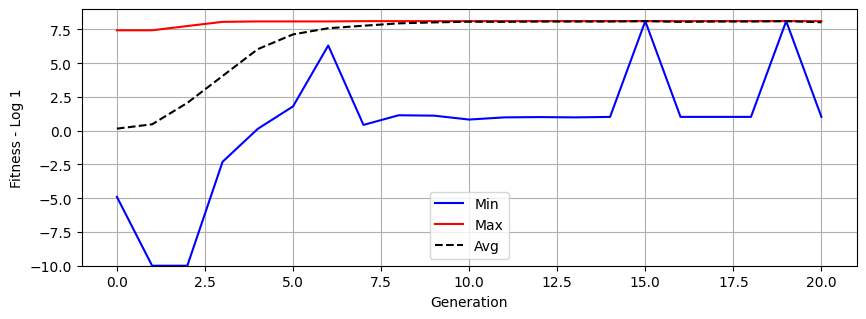

In [ ]:
plot_evolucion([logbook])

De igual manera que en la tabla aquí se puede observar la evolución de la población a lo largo de las épocas. Se puede observar cómo a partir de la época 3 se acerca bastante al máximo. Sin embargo, esta representación no nos permite observar de manera efectiva la aproximación al máximo absoluto. Por otro lado, observamos también como varía la media de la población y de cómo va convergiendo hacia el valor máximo de esta forma observamos la eficacia de la explotación elaborada.

###**6. Comparación con otros modelos creados**

#### **6.1 Un punto de cruce vs Dos puntos de cruce**

Tal como se nos indica se realiza una comparación entre el mejor resultado obtenido mediante cruce con un punto de corte y cruce con dos puntos de corte

In [ ]:
def funcion_objetivo(z):
    """
    Función objetivo de nuestro problema
    """
    for i in range(len(z)):
        if z[i] > 100 or z[i] < -100:
            return -10,
    x = z[0]
    y = z[1]
    res = 3*(1-x)**2*math.exp(-(x**2)-(y+1)**2)-10*(x/5-x**3-y**5)*math.exp(-x**2-y**2)-1/3*math.exp(-(x+1)**2-y**2) # FO
    return res,

El algoritmo que mejor resultado obtiene con un punto de corte tiene la siguiente representación:
* Intervalo: [-100,100]
* Población inicial: *256*
* Cruce: *Un punto de corte*
* Mutación: *Gaussiana - media:0 - desviación:5*
* Selección: *Por torneo de 3 individuos*
* Probabilidad de cruce: *0.4*
* Probabilidad de mutación: *0.325*
* Número de generaciones: *100*

Se elabora todo de una vez y guardamos sus mejores individuos en hof1 y sus estadísticas en logbook1

In [ ]:
random.seed(0)

toolbox = base.Toolbox()
toolbox.register("attr_uniform", random.uniform, -100, 100)
toolbox.attr_uniform()
toolbox.register("individual", tools.initRepeat, creator.Individual,
                 toolbox.attr_uniform, 2)
toolbox.individual()
toolbox.register("population", tools.initRepeat, list, toolbox.individual, 256)
toolbox.register("evaluate", funcion_objetivo)
toolbox.register("mate", tools.cxOnePoint)
toolbox.register("mutate", tools.mutGaussian, mu=0,
                 sigma= 5, indpb=0.2)
toolbox.register("select", tools.selTournament, tournsize=3)
CXPB, MUTPB, NGEN = 0.4, 0.325, 100
pop = toolbox.population()
hof1 = tools.HallOfFame(3)
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("avg", np.mean)
stats.register("std", np.std)
stats.register("min", np.min)
stats.register("max", np.max)
logbook1 = tools.Logbook()
pop, logbook1 = algorithms.eaSimple(pop, toolbox, cxpb=CXPB,
                                       mutpb=MUTPB, ngen=NGEN, stats=stats,
                                       halloffame=hof1, verbose=False)

El algoritmo que mejor resultado obtiene con dos puntos de corte tiene la siguiente representación:
* Intervalo: [-100,100]
* Población inicial: *256*
* Cruce: *Un dos de corte*
* Mutación: *Gaussiana - media:0 - desviación:5*
* Selección: *Por torneo de 3 individuos*
* Probabilidad de cruce: *0.675*
* Probabilidad de mutación: *0.3*
* Número de generaciones: *100*

Se elabora todo de una vez y se guarda sus mejores individuos en hof2 y sus estadísticas en logbook2

In [ ]:
random.seed(0)

toolbox = base.Toolbox()
toolbox.register("attr_uniform", random.uniform, -100, 100)
toolbox.attr_uniform()
toolbox.register("individual", tools.initRepeat, creator.Individual,
                 toolbox.attr_uniform, 2)
toolbox.individual()
toolbox.register("population", tools.initRepeat, list, toolbox.individual, 256)
toolbox.register("evaluate", funcion_objetivo)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutGaussian, mu=0,
                 sigma= 5, indpb=0.2)
toolbox.register("select", tools.selTournament, tournsize=3)
CXPB, MUTPB, NGEN = 0.675, 0.3, 100
pop = toolbox.population()
hof2 = tools.HallOfFame(3)
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("avg", np.mean)
stats.register("std", np.std)
stats.register("min", np.min)
stats.register("max", np.max)
logbook2 = tools.Logbook()
pop, logbook2 = algorithms.eaSimple(pop, toolbox, cxpb=CXPB,
                                       mutpb=MUTPB, ngen=NGEN, stats=stats,
                                       halloffame=hof2, verbose=False)

Se imprimen los mejores resultados obtenidos en cada uno de los algoritmos

In [ ]:
print("Mejor fitness: %f" %hof1[0].fitness.values)
print("Mejor individuo %s" %hof1[0])
print("Mejor fitness 2: %f" %hof1[1].fitness.values)
print("Mejor individuo 2: %s" %hof1[1])
print("Mejor fitness 3: %f" %hof1[2].fitness.values)
print("Mejor individuo 3: %s" %hof1[2])

Mejor fitness: 8.105975
Mejor individuo [-0.006671441538868712, 1.5847570656184877]
Mejor fitness 2: 8.105413
Mejor individuo 2: [-0.017897988089462084, 1.5847570656184877]
Mejor fitness 3: 8.104934
Mejor individuo 3: [-0.0207965932276787, 1.5847570656184877]


In [ ]:
print("Mejor fitness: %f" %hof2[0].fitness.values)
print("Mejor individuo %s" %hof2[0])
print("Mejor fitness 2: %f" %hof2[1].fitness.values)
print("Mejor individuo 2: %s" %hof2[1])
print("Mejor fitness 3: %f" %hof2[2].fitness.values)
print("Mejor individuo 3: %s" %hof2[2])

Mejor fitness: 8.106116
Mejor individuo [-0.009614926278708979, 1.5838063579606723]
Mejor fitness 2: 8.104920
Mejor individuo 2: [-0.009614926278708979, 1.59030239639922]
Mejor fitness 3: 8.104555
Mejor individuo 3: [0.0046143563988345244, 1.5838063579606723]


Se observa como los resultados obtenidos por ambos algoritmos no difieren mucho entre sí. Ambos consiguen un resultado bastante aceptable hasta el cuarto decimal y con un buen rendimiento de explotación. Sin embargo, aunque sean muy parecidos, el resultado obtenido por 2 puntos de cruce resulta ser más efectivo que el de 1 punto de cruce.

No obstante, se han realizado 100 generaciones en cada algoritmo pero puede que uno converga antes que otro. Para observar esto correctamente se dibujarán los gráficos de evolución de ambos algoritmos.

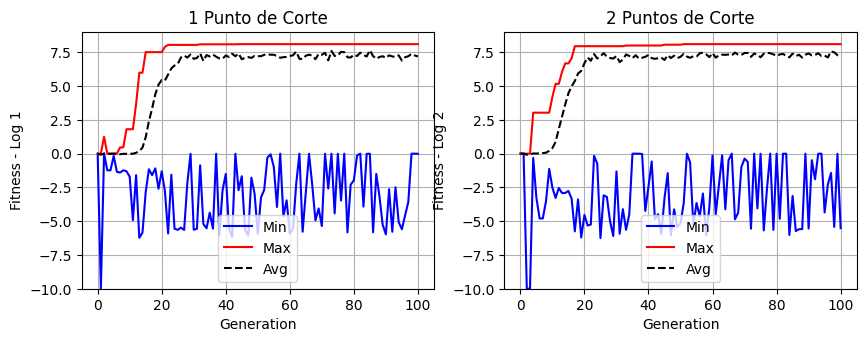

In [ ]:
plot_evolucion([logbook1, logbook2],['1 Punto de Corte', '2 Puntos de Corte'])

Se puede observar como ambas gráficas son muy parecidas, pero resulta que de nuevo el algoritmo con 2 puntos de corte converge más rápidamente hacia la solución óptima que con 1 punto de corte.

De esta manera, se concluye que el algoritmo con cruce en 2 puntos de corte es ligeramente mejor que con 1 punto de corte para esta función objetivo particular

####**6.2 Pruebas realizadas**

A la hora de encontrar el mejor algoritmo para resolver nuestro problema es esencial realizar pruebas heurísticas correctas para determinar los parámetros adecuados. Para ello, lo primero que se tiene en cuenta son las probabilidades de cruce y mutación. Aplicando una técnica de aproximación a los máximos acercándonos a aquellos valores que nos dan un fitness mayor. Para ello, se comienza con un paso más ámplio y se prosigue a pasos más pequeños en la dirección donde se obtienen mejores resultados.

Una vez se han encontrado dichos valores de probabilidades, optamos por el mejor modelo para aplicarles cambios en los estilos de cruce, mutación y selección. Realizando el mismo tipo de técnica para la obtención de los parámetros adecuados en cada caso.

Representación algoritmo base:
* Intervalo: [-100,100]
* Mutación: *Gaussiana - media:0 - desviación:5*
* Selección: *Por torneo de 3 individuos*
* Probabilidad de cruce: *0.5*
* Probabilidad de mutación: *0.2*
* Número de generaciones: *100*

#####Pruebas cruce **1 punto de corte**
  
* Pruebas población **128 individuos**
  * Se probaron las siguientes probabilidades de **cruce**: *0.25, 0.3, 0.325,0.35,0.4,0.5,0.75*. El mejor resultado obtenido fue **8.102798** con **0.325**
  * Aplicando la probabilidad de cruce de 0.325 buscamos la mejor probabilidad de **mutación** entre las siguientes opciones: *0.1,0.2,0.3,0.325,0.35,0.4*. El mejor resultado obtenido fue **8.104062** con el valor de **0.325**
  
* Pruebas población **256 individuos**
  * Se probaron las siguientes probabilidades de **cruce**: *0.25, 0.4,0.5,0.75*. El que mejor resultado obtuvo fue **0.4** con el resultado de **8.105329**
  * Aplicando la probabilidad de cruce de 0.4 buscamos la mejor probabilidad de **mutación** entre las siguientes opciones: *0.1,0.2,0.3,0.325,0.35*. El que mejor resultado obtuvo fue **0.325** con el valor de **8.106210**

  **Conclusión**: *El aumento de los individuos aumenta el valor de fitness óptimo encontrado debido a una mayor representación de las soluciones candidatas en cada generación. En ambos casos se obtienen probabilidades optimas de cruce y mutación parecidos. La probabilidad de cruce es baja debido a que no se requiere demasiada exploración puesto al bajo número de máximos. Por otro lado, la probabilidad de mutación es medio-alta debido a que queremos profundizar lo suficiente en los máximos disponibles pero sin quedarnos atascados en los relativos.*

#####Pruebas cruce **2 puntos de corte**
  
* Pruebas población **128 individuos**
  * Se probaron las siguientes probabilidades de **cruce**: *0.25,0.5,0.725,0.75,0.775*. El que mejor resultado obtuvo fue **0.75** con el resultado de **8.104232**
  * Aplicando la probabilidad de cruce de 0.75 buscamos la mejor probabilidad de **mutación** entre las siguientes opciones: *0.1,0.15,0.2,0.25,0.3,*. El que mejor resultado obtuvo fue **0.2** con el valor de **8.104232**

* Pruebas población **256 individuos**
  * Se probaron las siguientes probabilidades de **cruce**: *0.25,0.5,0.6,0.65,0.675,0.75*. El que mejor resultado obtuvo fue **0.675** con el resultado de **8.105383**
  * Aplicando la probabilidad de cruce de 0.675 buscamos la mejor probabilidad de **mutación** entre las siguientes opciones: *0.1,0.2,0.3,0.325,0.35,0.4*. El que mejor resultado obtuvo fue **0.325** con el valor de **8.106004**

  **Conclusión**: *El aumento de los individuos aumenta el valor de fitness óptimo encontrado debido a una mayor representación de las soluciones candidatas en cada generación. En ambos casos se obtienen probabilidades optimas de cruce y mutación parecidos. La probabilidad de cruce es alta debido a que el cruce con dos puntos de corte produce un aumento en la explotación y una disminución en la exploración, por ello para recuperar el equilibrio es necesario aumentar la probabilidad de cruce, aumentando asi de nuevo la capacidad de exploración deseada. Por otro lado, la probabilidad de mutación es medio-alta debido a que queremos profundizar lo suficiente en los máximos disponibles pero sin quedarnos atascados en los relativos.*

Se puede observar que los algoritmos anteriores obtienen un buen resultado en cuanto al llegar al optimo se refiere, sin embargo requieren de unas 60 generaciones para alcanzar un valor cercano por primera vez. Es por ello que buscamos probar diversos cambios que aplicar para acelerar el proceso. Los siguientes cambios han sido aplicados unicamente sobre el mejor modelo obtenido, que tiene la siguiente representación:
* Intervalo: [-100,100]
* Población: *256 individuos*
* Cruce: *un punto de corte*
* Mutación: *Gaussiana - media:0 - desviación:5*
* Selección: *Por torneo de 3 individuos*
* Probabilidad de cruce: *0.4*
* Probabilidad de mutación: *0.325*
* Número de generaciones: *100*

#####Pruebas cruce **Blend**
* Se probaron los siguientes valores de **alfa**: *0.25,0.45,0.5,0.55,0.75*.El que mejor resultado obtuvo fue **0.5** con el resultado de **8.10621** en la **generación 17**

**Conclusión**: *El cruce Blend nos permite realizar de manera simultanea la tarea de exploración y explotación en un mismo cruce. Este tipo de cruce, como se expuso anteriormente, es una convinación lineal entre los padres sin requerir emparejamientos fijos entre estos, consiguiendo de esta manera un cruce flexible y robusto que aporta una gran diversidad génetica y nos permite alcanzar resultados mucho mas rápido.*

#####Pruebas mutación **Flip Bit**
* Aplicando el cruce Blend con alfa 0.5 se prueba la mutación Flip Bit con los valores de indpb: *0.05,0.1,0.15,0.2*.El que mejor resultado obtuvo fue **0.15** con el resultado de **8.106214** en la **generación 13**

  **Conclusión**: *La mutación Flip Bit nos da una gran ventaja en cuanto a la explotación y exploración dentro de nuestra población. Como se expuso con anterioridad, esta mutación cambia los bits uno a uno permitiendo asi una gran capacidad de explorar el espacio de soluciones, superar los máximos y mínimos locales, y preservar una adecuada diversidad genética. De esta forma, esta mutación considera muchas posibles buenas soluciones candidatas en un corto número de generaciones, sobre todo ideal para funciones objetivo las cuales tengan muchos picos.*

Una vez hecho esto se prueba a disminuir el intervalor puesto que la mayoria de registros tienen valor 0 y no nos aportan ningun tipo de valor beneficiario. Para ello nos concentramos en el intervalo central [-5,5] en ambos ejes donde se observa gráficamente que se encuentran los máximos y mínimos de la función objetivo.

##### Pruebas **intervalo [-5,5]**
Se toma el modelo anterior como base y se aplican cambios en las probabilidades de cruce y mutación
* Se probaron las siguientes probabilidades de **cruce**: *0.25,0.3, 0.35,0.5,0.75*. El que mejor resultado obtuvo fue **0.3** con el resultado de **8.106214** en la **generación 16**
* Aplicando la probabilidad de cruce de 0.3 buscamos la mejor probabilidad de **mutación** entre las siguientes opciones: *0.1,0.125,0.15,0.2,0.3*. El que mejor resultado obtuvo fue **0.125** con el valor de **8.106214** en la **generación 13**

  **Conclusión**: *Tal como se observo gráficamente los valores de la función objetivo en el intervalo [-100,100] eran la mayoria casi nulos, lo cual no aportaba para la resolución de encontrar el máximo de la función. De esta manera, disminuyendo el espacio de soluciones de soluciones candidatas, nos podemos centrar mas en aquellas soluciones que sabemos que pueden ser la solución óptima.*

##### Pruebas extra
Las siguientes pruebas fueron evaluadas aunque no se obtuvieron resultados de mejora:
* Cruce: *Simulated Binary*
* Mutación:*Permutación*
* Selección: *Ruleta sesgada, ranking y elitista*

#**2.- Encontrar los mínimo de la función 'Rastrigin'**

$$z = f(x_{1},...,x_{10}) = 100+\sum_{i=1}^{10} [x_{i}^2-10{cos(2πx_{i})]}$$

En el dominio $$\{x_{1},...,x_{10}\} \in [-5.12,5.12]$$

## **Introducción**
Como se ha mencionado en el ejercicio anterior, la capacidad de los algoritmos genéticos para equilibrar la exploración y la explotación en espacios de búsqueda complejos es fundamental, convirtiéndolos en herramientas de gran utilidad. Estos algoritmos poseen la capacidad de explorar extensivamente, así como de operadores genéticos, como la mutación y el cruce, que aumentan la probabilidad de escapar de mínimos locales.

El ejercicio anterior se trataba de maxmimizar. Sin embargo, en este nos enfocaremos en determinar el **mínimo** de la función Rastrigin mediante el uso de un algoritmo genético como herramienta de optimización metaheurística para abordar problemas complejos. La complejidad de la función de Rastrigin de 10 dimensiones radica en su naturaleza multidimensional y en la dificultad asociada con una superficie de optimización no convexa.

Es crucial destacar que, al igual que en el ejercicio anterior con la función 'picos', las soluciones generadas por el algoritmo genético deben ser válidas. Es decir, que las variables independientes se encuentren dentro de los rangos establecidos.

La función Rastrigin tiene **múltiples mínimos locales**, pero **solo un mínimo global en f(x) = 0**, donde todas las variables son x_i = 0. La presencia de numerosos mínimos locales ponen a prueba el algoritmo de optimización que se emplea para encontrar la solución global.

Visualizar cuál es la resupuesta correcta

In [ ]:
# Fijamos la semilla. Si no cambiamos la semilla,
# la función generará los mismos número aleatorios
random.seed(0)

## **Creación del algoritmo genético**

Para crear el algoritmo genético, se llevan a cabo los siguientes pasos:
1. Definición del problema y generación de la población inicial

  1.1 Creación del problema

  1.2 Creación de la plantilla del individuo

  1.3 Crear individuos aleatorios y población inicial


2. Función objetivo
3. Operadores genéticos

  3.1 Operador de cruce

  3.2 Operador de mutación

4. Definición de la selección

5. Últimos pasos: Algortimo Evolutivo Simple

  5.1 Resultados del algoritmo genético
  
6. Comparación con otros modelos creados


In [ ]:
random.seed(0)

###**1 Definición del problema y generación de la población inicial**
####**1.1 Creación del problema**
Se repite el mismo proceso que en el ejercicio anterior. Sin embargo, como este caso es de minimizar, la clase FitnessMin tiene un atributo llamado weights, que se establece en (-1.0,). La asignación de un **peso negativo**, en este caso, indica que se está tratando de minimizar el valor de la función de aptitud. En problemas de minimización, el objetivo es encontrar el valor más bajo posible, y al asignar un peso negativo, se indica a los algoritmos evolutivos que deben buscar individuos con valores de aptitud más bajos.


In [ ]:
# Utilizando la función deep se crea un tipo de clase llamado FitnessMin
# base.Fitness --> contiene un atributo llamado weigths
# La clase Fitness proporciona funcionalidades básicas para representar
# la aptitud (fitness) de un individuo en un algoritmo evolutivo
# Especifíca los pesos asociados, a cada objeto se le asigna un peso -1.0 -negativo
# Este peso indica que estamos tratando de minimizar el valor de la función de aptitud.

creator.create("FitnessMin", base.Fitness, weights=(-1.0,))

####**1.2 Creación de la plantilla del individuo**
Se establece la **estructura básica** para representar individuos de un algoritmo evolutivo de minimización. La clase 'Individual' es la representación genérica de un individuo, y la asociación con el objeto FitnessMin define cómo se evalúa su aptitud en el contexto del problema de minimización.

In [ ]:
# Crea un nuevo tipo de clase llamado 'Individual'
# Los individuos serán listas
# Especifica que los individuos de esta clase tendrán asociado un objeto de
# tipo "FitnessMax", que has definido previamente. Este objeto de fitness
# determina cómo se evalúa la aptitud (fitness) de un individuo en el contexto
# de un algoritmo evolutivo de maximización.
creator.create("Individual", list, fitness=creator.FitnessMin)

In [ ]:
# Crea una instancia de la clase Toolbox en el módulo deap. Un Toolbox es
# una caja de herramientas que se utiliza para organizar los operadores genéticos
# (como selección, cruzamiento, mutación) y otros componentes necesarios
# para ejecutar un algoritmo evolutivo.

toolbox = base.Toolbox()

Al registrar la función attr_uniform en el toolbox, estamos definiendo cómo **generar genes** para representar las coordenadas de los individuos en nuestro espacio de búsqueda. En este caso, estamos utilizando la función random.uniform del módulo random para asignar valores uniformemente distribuidos dentro del rango [-5.12, 5.12] a las coordenadas de los individuos.



In [ ]:
# Generación de genes (fenotipo dentro del rango)
# toolbox.register(función, aleatorios, restricciones)
toolbox.register("attr_uniform", random.uniform, -5.12, 5.12)

In [ ]:
# Probamos y vemos que generamos un número leatorio entre -100 y 100 distinto cada vez
toolbox.attr_uniform()

3.5268797596164925


En el enunciado, se pide minimizar la función para n = 10. Por lo tanto, se tendrá 10 dimensiones con 10 variables, siendo ésta una función multidimensional. Esto quiere decir que los individuos no están formados por 2 coordenadas sino por 10 coordenadas (representando el fenotipo), debido a que cada una de las 10 dimensiones se representa en un eje distinto. Se obtienen los individuos cuyo genotipo están formados por 640 bits. El tamaño ideal de la población, como se ha mencionado anteriormente, debe encontrarse entre L y 2L. Es decir, que el tamaño de población máxima será 1280 individuos. Al tener una cantidad tan elevada de bits en el problema, es muy importante utilizar tanto el operador de cruce (de 1 y 2 puntos) como el de mutación. Al tener un genotipo de 640 bits, para poder encontrar la solución se aplica el operador de mutación de bit uniforme representado por genotipos binarios, como ya se ha explicado previamente en el anterior ejercicio. Esto consigue que el número de generaciones necesarias se reduzca enormemente.



In [ ]:
# Generación de inviduos
# toolbox.register(función , función n veces, tipo de dato, función que genera, número de repe)
toolbox.register("individual", tools.initRepeat, creator.Individual,
                 toolbox.attr_uniform, 10)

In [ ]:
# Ejemplo de la generación de un individuo aleatorio
individuo = toolbox.individual()
individuo

[2.6414530861086973,
 -0.8133470122921471,
 -2.4686924770000553,
 0.11545314681455121,
 -0.973474432507758,
 2.906097551716072,
 -2.0140776849517827,
 -0.23964718947987684,
 0.8538320840195199,
 4.179075944400233]

In [ ]:
# Recordar que individuo es una lista que tiene un atributo fitness
# donde se almacena la calidad del mismo, que al principio será
# vacío, porque aun no ha sido evaluado
individuo.fitness.values

()

Número de bits usados:
Cada elemento usa 64 bits al tratarse de una función en 10 dimensiones, cada individuo tiene 10 elementos, por lo tanto cada individuo tiene 640 bits.

In [ ]:
print(individuo[0])

c = individuo[0]

# Convertir el número float a formato binario
binary_representation = format(struct.unpack('!Q', struct.pack('!d', c))[0], '064b')

# Contar la longitud de la cadena binaria
print(len(binary_representation))

2.6414530861086973
64


#### **1.3 Crear individuos aleatorios y población inicial**

Se genera la población, cuyo tamaño se irá modificando para relizar las pruebas necesarias que nos permitan resolver el problema del mínimo global de esta función. Siempre en el rango entre L y 2L, siendo L el número de bits del genotipo del individuo.


In [ ]:
# Generación de población
# toolbox.register(función , función n veces, tipo de dato, función que genera, número de repe)

toolbox.register("population", tools.initRepeat, list, toolbox.individual, 1280)
# toolbox.register("population", tools.initRepeat, list, toolbox.individual)

In [ ]:
# Ejemplo de creación de una población. Se ve que es
# una lista de 32 listas (una por cada individuo)
poblacion = toolbox.population()
print(poblacion)

[[0.047993403570075976, -2.233980473347033, 2.6194350505699733, 1.2120985259553958, -2.5548150644486087, 4.195801661114779, 4.943723274625568, 3.1766244966050765, 4.1181793325013265, -1.944088890170034], [2.3534771021837173, 4.084104068792253, 1.8839954628141182, -0.28525859376421536, -4.088819629379934, -0.6740804049532549, 1.1354826080645282, 4.229233185156079, 4.778049205972571, -0.23541988810017767], [3.7407736603815946, -2.4525587415863357, 3.1234849486133482, 0.49868087127643435, -4.976212990320446, 2.2497759887764905, -1.036046927623488, 3.3264125659979067, 1.7218887806141527, -5.108297530220255], [-0.06576264739507565, 3.764252421046076, -2.622352620675769, -1.789907325466726, 3.793625416792623, -3.163472983015521, 0.69130998395568, -2.6765728909801454, 4.787612162971068, 3.104557765425869], [-0.5327915884997596, -4.296234818022038, -1.8426408481531316, 0.08131217941067703, 4.432218360083525, -4.003247657665498, 0.5249765999672444, 2.11518883703695, 0.485794932003059, 3.2201406

In [ ]:
# Cada individuo tiene 2 componentes
poblacion[0]

[0.047993403570075976,
 -2.233980473347033,
 2.6194350505699733,
 1.2120985259553958,
 -2.5548150644486087,
 4.195801661114779,
 4.943723274625568,
 3.1766244966050765,
 4.1181793325013265,
 -1.944088890170034]

In [ ]:
# Está destinada a acceder a los valores de aptitud (fitness) del
# primer individuo en una población. Ahora vacia no se ha creado nada.
poblacion[0].fitness.values

()

### **2. Función Objetivo**

De la misma forma, se genera la función objetivo que evalua la aptitud del individuo. Penalizando aquellos que se encuentran fuera del rango y calculando el valor de la función objetivo para los que están dentro. Por lo tanto, en este problema que se buscar minimizar la función, el objetivo sería encontrar valores de las variables de decisión que minimicen la función objetivo. A medida que el número de generaciones aumenta, es más probable que la adaptación media se aproxime a la del mejor individuo.

**Penalización:**

Para definir la función objetivo deberemos tener en cuenta las restricciones de que el valor aleatorio generado no se encuentre en el espacio deseado. Para ello determinaremos que su valor en la funcion objetivo sea "negativo" y que no afecte, para hacer esto, como nuestro objetivo es minimizar, deberemos escoger un valor que este por encima del maximo para que asi sea la peor solución posible. Para ello, realizaremos el máximo posible por cada uno de los sumandos de manera individual para reducir la complejidad:

$$ max(100) = 100$$
$$ max(x_{i}^2) = 5.12^2 = 26.2$$
$$ max(-{cos(2πx_{i}))} = 1 $$
$$ 100 + \sum_{i=1}^{10} [x_{i}^2-10{cos(2πx_{i})}] = 100 + \sum_{i=1}^{10} [26.2+10] = 100 + \sum_{i=1}^{10} 36.2 = 100 + 362 = 462 $$

De esta manera el valor debera ser 462 o mayor para tener la penalización máxima. Elegimos esta valor como nuestra penalización.

In [ ]:
# Función objetivo
# Itera sobre todos los elementos de la lista
# Si se encuetra fuera del rango se penaliza con FO = 462
# SI está dentro se calcula el fitnesss o aptitud

# Definimos la función objetivo como función prueba
def funcion_objetivo(z):
    """
    Función objetivo de nuestro problema
    """
    for i in range(len(z)):
        if z[i] > 5.12 or z[i] < -5.12:
            return 462,

    coseno = [0]*len(z)
    for i in range(len(z)):
      coseno[i] = math.cos(2 * np.pi * np.array(z[i]))

    res = float(10*len(z) + sum(np.array(z)**2) - 10 * sum(np.array(coseno)))
    return res,

In [ ]:
# Función objetivo
# toolbox.register(función, función que utiliza)
toolbox.register("evaluate", funcion_objetivo)

In [ ]:
# Ejemplo de uso 1
funcion_objetivo(individuo)

(111.03693733654694,)

In [ ]:
# Ejemplo de uso 2
toolbox.evaluate(individuo)

(111.03693733654694,)

### **3. Operadores genéticos**

#### **3.1 Operador de cruce**
El cruce es un operador genético que combina la información genética de dos padres para generar descendencia. Dos tipos comunes de cruce son el cruce por un punto y el cruce por dos puntos. Aquí hay una explicación de la diferencia entre ambos:

En el cruce por un punto, un punto de corte se elige aleatoriamente entre los cromosomas de los padres.
La información genética de un padre se intercambia con la información genética del otro padre después del punto de corte, produciendo dos descendientes, cada uno compuesto por una parte de un padre y una parte del otro.
Por lo tanto, en el cruce por un punto, se intercambia la información genética a un lado del punto de corte. Al introducir dos puntos de corte, se intercambia la información genética entre los dos puntos, produciendo una mayor diversidad genética en la descendencia al intercambiar regiones más grandes de información genética entre los padres.


In [ ]:
# Registrar la operación gnética de cruce por un punto
# toolbox.register(función, función tipo de cruce)
toolbox.register("mate", tools.cxOnePoint)

#### **3.2 Operador de mutación**

En la naturaleza, los individuos que están peor adaptados van desapareciendo, mientras que se quedan en las siguientes generaciones aquellos mejores adaptados, que a la vez van sufriendo transformaciones en su genética con el tiempo, mejorando la descendencia que van dejando. Para representar estos cambios, se introduce el operador mutación en el algoritmo genético.
La mutación simula los cambios aleatorios que pueden ocurrir en los genes de un organismo en la naturaleza, modificando algunos bits del genotipo. Este operador es esencial para explorar el espacio de búsqueda y evitar que el algoritmo genético se quede atrapado en óptimos locales.

La mutación bit uniforme es una una estrategia que consiste en que cada bit en el genotipo tiene una probabilidad independiente de cambiar. Es decir, que si un bit se muta en una iteración, la probabilidad de que el mismo bit se mute en la siguiente iteración es independiente de la mutación anterior, ayudando así a mantener la diversidad en la población.

Además, el porcentaje de bits que se mutan se controla mediante un parámetro de tasa de mutación. Tras realizar diferentes pruebas con valores distintos de cruce, mutación y tamaño de población, se determinó la probabilidad de mutación con la que mejor funciona el algoritmo. En este caso específico, el porcentaje de mutación es del 0.3. Esto significa que, para cada bit en cada genotipo de la población, hay una probabilidad del 0.3 (o del 30%) de que ocurra una mutación en ese bit durante una iteración de la mutación.

Por otro lado, una tasa de mutación más alta promueve la exploración del espacio de búsqueda, lo cual es esencial en un problema como este, que incluye un número muy elevado de bits. De esta forma, se puede explorar nuevas soluciones y regiones del espacio de búsqueda que podrían contener soluciones óptimas.



In [ ]:
# Registra la operación gnética de mutación
# indpb = 0.3 --> probabilidad de mutar el gen de un individuo (cntrol de cuantos se mutan)
# Si la prob generada es menor de 0.3 se muta (30%)
# toolbox.register(función, distribución, prob.mutación)

toolbox.register("mutate", tools.mutFlipBit, indpb=0.3) # Funciona de locos no se si es trampa

### **4. Definción de selección**
Se aplica el operador de selección por torneo de tamaño 3, al igual que se ha hecho y explicado en el ejercicio anterior.

In [ ]:
# Selección mediante torneo
# La selección de individuos es con remplazo
# toolbox.register(función, tipo de selección (torneo), cantidad de individuos en el torneo)

toolbox.register("select", tools.selTournament, tournsize=3)

**Conclusiones del apartado 3 y 4:**

Las ventajas del operador genético de un punto de cruce en este problema son notables, abarcando desde la convergencia hacia óptimos globales, gracias a la promoción de diversidad genética mientras se preserva la información de los padres.

Es esencial equilibrar la exploración y explotación, por lo que se han ajustado los operadores de cruce para permitir la explotación cuando los padres son buenos, pero siempre manteniendo la posibilidad de cruzarse con individuos de menor calidad, lo que puede tanto empeorar como mejorar el valor en la función objetivo. Además, hay que tener en cuenta que probablemente se crucen en un punto donde se mezclen en un eje y pueda suceder que un individuo peor adaptado con otra parte inicial o final en ese punto, mejore significativamente.

En cuanto a los valores utilizados en el operador de mutación bit uniforme, se ha configurado con una probabilidad del 0.3 para proporcionar la exploración suficiente (el 30% de los bits mutaran aproximadamente) y equilibrarla con el operador de cruce de un solo punto, que tiende a preservar más la información genética. Además, se ha considerado el tipo de selección, que es por torneo de 3 individuos con reemplazo. Esto evita la pérdida del mejor individuo y, al mismo tiempo, impide la formación de "superindividuos" que podrían limitar la exploración de otras posibilidades. En conjunto, estas adaptaciones buscan optimizar la eficacia del algoritmo genético en la resolución del problema de minimización con individuos de 640 bits y múltiples óptimos locales.



###**5. Últimos pasos: Algoritmo Evolutivo Simple**

Como último paso en la elaboración de nuestro algoritmo es la selección de las variables CXPB, MUTPB, NGEN. Estas tres variables se corresponden con la **Probabilidad de cruce**, la **Probabilidad de mutación**, y el **número de generaciones** a llevar a cabo que están explicados en el ejercicio 1 apartado 5.

Una vez conociendo este concepto, se eligen mediante pruebas metaheurísticas los parámetros óptimos para solucionar nuestro problema. De esta forma, se obtienen los siguientes resultados:
* Probabilidad de Cruce de 0.25. Es una probabildidad no muy elevada (<0.5) la cual se debe principalmente a que aunque nos interese realizar una elevada exploración debido a que existen una gran variedad de máximos y mínimos en esta función, tenemos una clase de mutación la cual nos permite realizar una exploración muy elevada, por lo que para equilibrar el sistema no nos es necesario ampliar mucho la probabilidad.
* Probabilidad de Mutación de 0.47. Es una probabilidad no muy elevada (>0.2) cambiando los genes de prácticamente un décimo de la población. Es una probabilidad elevada (>0.2) cambiando los genes prácticamente en la mitad de la población. Esto lo que nos permite es realizar una explotación adecuada sobre los mínimos que se poseen, debido a que una explotación más elevada podría provocar atascos en mínimos  relativos, y una explotación demasiado baja  provocaría una pérdida de información sobre cada mínimo analizado pudiendo ignorar varias veces al mínimo absoluto.
* Número de generaciones es de 10. Un número no muy elevado y que acarrea poco coste computacional y que nos permitirá ver si tenemos un algoritmo eficiente en pocas generaciones.

In [ ]:
# Definimos:
#  CXPB: Probabilidad de Cruce
#  MUTPB: Probabilidad de Mutación
#  NGEN: Número de Generaciones
# Los valores son de prueba para obtener unos resultados preeliminares
CXPB, MUTPB, NGEN = 0.25, 0.47, 10

Generamos la población inicial con la que trabajará el algoritmo, que estará formada por 1280 individuos. Cada individuo poseerá diez coordenadas, cada cual correspondiente al valor de la coordenada *xi*.

In [ ]:
#Generamos la Población Inicial
# pop = toolbox.population()
pop = toolbox.population()
pop

[[2.13762836220305,
  -2.7306017001709937,
  -1.3796593262479009,
  -2.1239871450835177,
  3.491245640686855,
  4.077143774477835,
  0.025201939522369265,
  -4.7690201212063,
  -3.284823885124588,
  3.595174720175973],
 [2.539304137663448,
  1.0461871311288142,
  0.04362473736471095,
  -1.4349410918549519,
  -0.0011223086939198268,
  -0.11416396373489679,
  0.02324528826400485,
  -4.454050775652448,
  1.6859810904844936,
  -2.4265251828157965],
 [-3.5136767597991136,
  -3.3636838304691254,
  -2.6857265853016656,
  1.2208258088399155,
  5.0782108097037595,
  -0.9822600148690164,
  -3.8697361978721427,
  -1.298098374692021,
  1.4360948290595976,
  -3.3427753948265346],
 [0.9347478884354663,
  -1.4836646711950108,
  -1.3005053708824175,
  2.1548951449126346,
  4.818495267304319,
  2.9715127918874797,
  -3.180238262997161,
  4.594512759909768,
  -1.96523119273838,
  3.2431631976312216],
 [-3.2991783774413603,
  2.9041545975710887,
  3.964899433995,
  -5.003062421900354,
  -2.98974879831362

Definimos el objeto hof que se encargará de almacenar a los tres mejores individuos a lo largo de las generaciones al aplicar el algoritmo. Estos tres mejores individuos nos permitirán conocer si se ha llegado hasta ellos de manera explorada o explotada mediante sus distancias.

In [ ]:
# Definimos el objeto hof que almacenará el mejor individuo
# encontrado a lo largo de las generaciones del Algoritmo G.
# En una instancia llamada 'HallOfFame'
# maxsize = 1 --> solo almacenará al mejor individuo
# No reemplaza si son iguales

hof = tools.HallOfFame(3)
hof

Confirmamos que hof está en el momento vacío

In [ ]:
print(hof)

[]


Definimos stats como un objeto para recopilar y almacenar las estadísticas de la población en cada generación.

In [ ]:
# Definimos un objeto para generar(recopila y almacena datos) las estadísticas de la
# población a lo largo de las generaciones del algoritmo
# lambda --> toma un individuo ind y muestra su valor en FO
stats = tools.Statistics(lambda ind: ind.fitness.values)
print(stats)

Las estadísticas que queremos manejar son la media del valor de la función objetivo en la poblacion, la desviación de los individuos, el individuo con el valor máximo y con el valor mínimo.

In [ ]:
# Cada línea de código registra una estadística particular con su
# correspondiente función para calcular dicha estadística.
stats.register("avg", np.mean) # --> media
stats.register("std", np.std)  # --> desviación
stats.register("min", np.min)  # --> mínimo
stats.register("max", np.max)  # --> máximo

Definimos logbook que será el objeto encargado de contener todo el registro de la evolución.

In [ ]:
# loogbook contendrá todo el registro de evolución
logbook = tools.Logbook()

####**5.1 Resultado del Algoritmo Genético**



Aplicamos nuestro algoritmo genético sobre la población inicial generada y observamos las estadísticas de su evolución.

In [ ]:
# Definimos:
#  CXPB: Probabilidad de Cruce
#  MUTPB: Probabilidad de Mutación
#  NGEN: Número de Generaciones
# Los valores son de prueba para obtener unos resultados preeliminares
# CXPB, MUTPB, NGEN = 0.5, 0.2, 20
# Difreencia entre MUTPB e indpb es:
# MUTPB --> Este parámetro controla la probabilidad global de que un individuo
# en la población experimente una operación de mutación en cada generación
# ... Tantos individuos serán mutados
# indpb --> Contexto específico de la operación de mutación de un individuo
# ... Dentro del genotipo la probabilida de que un gen se mute
# pop --> población de individuos en la cual se ejecutará el algoritmo
# verbose --> comenta las jugadas del algoritmo
# eaSimple --> algoritmo evolutivo simple
# logbook -->  info detallada sobre el progreso del algoritmo evolutivo a lo largo de las generaciones

pop, logbook = algorithms.eaSimple(pop, toolbox, cxpb=CXPB,
                                       mutpb=MUTPB, ngen=NGEN, stats=stats,
                                       halloffame=hof, verbose=True)

gen	nevals	avg   	std    	min    	max    
0  	1280  	184.53	33.4272	83.9565	282.383
1  	775   	134.83	36.8914	32.5119	231.544
2  	798   	88.1959	34.5748	1      	182.64 
3  	782   	52.2298	25.043 	1      	164.954
4  	799   	27.1708	16.7362	0      	110.06 
5  	793   	12.737 	9.56031	0      	51.782 
6  	718   	5.69781	4.09388	0      	28.9743
7  	764   	3.56438	1.62955	0      	15.124 
8  	745   	2.98595	1.53752	0      	8      
9  	752   	2.7177 	1.63747	0      	8.00255
10 	796   	2.48064	1.65877	0      	9      


En la tabla anterior observamos las siguientes columnas:
* gen: *generación en la que nos encontramos*
* nervals: *nuevos individuos para esta generación*
* avg: *media del valor de la función objetivo en toda la población*
* std: *desviación estandar del valor de la función objetivo de toda la población sobre la media*
* min: *valor mínimo de la función objetivo que posee un individuo de esta generación*
* max: *valor máximo de la función objetivo que posee un individuo de esta generación*

Observando estos datos podemos ver la evolución del algoritmo a lo largo de las generaciones. Centrándonos en nuestro objetivo, que es minimizar, nos centramos más en la penúltima columna. En ella observamos que llegamos al auge en la generación número 5, y que además es un valor que permanece invariable para el resto de generaciones, siendo así nuestro resultado óptimo.

A continuación observaremos mediante el objeto hoff cuales son los mejores individuos a lo largo de las 10 generaciones y cual es su valor correspondiente en la función objetivo.

In [ ]:
print("Mejor fitness: %f" %hof[0].fitness.values)
print("Mejor individuo %s" %hof[0])
print("Mejor fitness 2: %f" %hof[1].fitness.values)
print("Mejor individuo 2: %s" %hof[1])
print("Mejor fitness 3: %f" %hof[2].fitness.values)
print("Mejor individuo 3: %s" %hof[2])

Mejor fitness: 0.000000
Mejor individuo [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Mejor fitness 2: 0.003823
Mejor individuo 2: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.004389674615496553, 0.0, 0.0, 0.0]
Mejor fitness 3: 0.099162
Mejor individuo 3: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.022375220665995066, 0.0]


Podemos ver cómo la explotación y exploración aplicada ha sido efectiva, y esto lo sabemos debido a la cercanía que existe entre los tres mejores individuos, estando ambos cercanos en las mismas coordenadas (*xi*) y con valores fitness que difieren en el segundo decimal.

El resultado óptimo para este problema seria *xi = 0 para todo i = 1...10* obteniendo asi un fitness de *0*.

Otra manera de observar los resultados de la tabla es mediante una gráfica donde las generaciones y el fitness son los valores de los ejes. A continuación, se representan los resultados obtenidos.

In [ ]:
def plot_evolucion(logs,titulos=['']):
    """
    Representa la evolución del mejor individuo en cada generación para varios logs
    """
    fig, axs = plt.subplots(1,len(logs), figsize=(10, 10/3), sharex=True)
    if len(logs)==1:
      axs = [axs]
    for i, log in enumerate(logs):
        gen = log.select("gen")
        fit_mins = log.select("min")
        fit_maxs = log.select("max")
        fit_ave = log.select("avg")

        axs[i].set_title(titulos[i])
        axs[i].plot(gen, fit_mins, "b")
        axs[i].plot(gen, fit_maxs, "r")
        axs[i].plot(gen, fit_ave, "--k")
        axs[i].set_xlabel("Generation")
        axs[i].set_ylabel("Fitness ")
        axs[i].set_ylim([0, 100])
        axs[i].legend(["Min", "Max", "Avg"], loc="lower center")
        axs[i].grid(True)

    #axs[-1].set_xlabel("Generation")
    plt.savefig("Convergencia_subplot.eps", dpi=300)

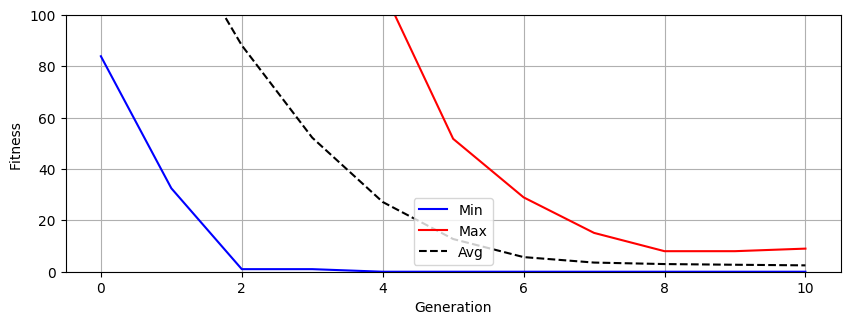

In [ ]:
plot_evolucion([logbook])

De igual manera que en la tabla, aquí podemos observar la evolución de la población a lo largo de las épocas. Podemos observar como a partir de la época 2 se acerca bastante al mínimo, y que es en la época 5 cuando ya llega a el estabilizándose. Además, se puede observar como varía la población, si nos fijamos en el valor de la media (*Avg*) observamos como esta también tiende hacia el mínimo según pasan las épocas, siendo así la mayor representación de lo elementos cercanos a este y realizando una correcta explotación sobre él.

### **6. Comparación con otros modelos creados**

####**6.1 Un Punto de Corte VS Dos Puntos de Corte**

Tal como se nos indica realizamos una comparación entre el mejor resultado obtenido mediante cruce con un punto de corte y cruce con dos puntos de corte

El algoritmo que mejor resultado obtiene con un punto de corte tiene la siguiente representación:
* Intervalo: [-5.12,5.12]
* Población inicial: *1280*
* Cruce: *Un punto de corte*
* Mutación: *Gaussiana - media:0 - desviación:5 - indpb:0.1*
* Selección: *Por torneo de 3 individuos*
* Probabilidad de cruce: *0.25*
* Probabilidad de mutación: *0.47*
* Número de generaciones: *100*

Lo elaboramos todo de una vez y guardamos sus mejores individuos en hof1 y sus estadísticas en logbook1

In [ ]:
random.seed(0)

toolbox = base.Toolbox()
toolbox.register("attr_uniform", random.uniform, -5.12, 5.12)
toolbox.attr_uniform()
toolbox.register("individual", tools.initRepeat, creator.Individual,
                 toolbox.attr_uniform, 10)
toolbox.individual()
toolbox.register("population", tools.initRepeat, list, toolbox.individual, 1280)
toolbox.register("evaluate", funcion_objetivo)
toolbox.register("mate", tools.cxOnePoint)
toolbox.register("mutate", tools.mutGaussian, mu=0,
                 sigma= 5, indpb=0.1)
toolbox.register("select", tools.selTournament, tournsize=3)
CXPB, MUTPB, NGEN = 0.25, 0.47, 100
pop = toolbox.population()
hof1 = tools.HallOfFame(3)
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("avg", np.mean)
stats.register("std", np.std)
stats.register("min", np.min)
stats.register("max", np.max)
logbook1 = tools.Logbook()
pop, logbook1 = algorithms.eaSimple(pop, toolbox, cxpb=CXPB,
                                       mutpb=MUTPB, ngen=NGEN, stats=stats,
                                       halloffame=hof1, verbose=False)

El algoritmo que mejor resultado obtiene con dos puntos de corte tiene la siguiente representación:
* Intervalo: [-5.12,5.12]
* Población inicial: *1280*
* Cruce: *Dos puntos de corte*
* Mutación: *Gaussiana - media:0 - desviación:5 - indpb:0.1*
* Selección: *Por torneo de 3 individuos*
* Probabilidad de cruce: *0.65*
* Probabilidad de mutación: *0.2*
* Número de generaciones: *100*

Lo elaboramos todo de una vez y guardamos sus mejores individuos en hof2 y sus estadísticas en logbook2

In [ ]:
random.seed(0)

toolbox = base.Toolbox()
toolbox.register("attr_uniform", random.uniform, -5.12, 5.12)
toolbox.attr_uniform()
toolbox.register("individual", tools.initRepeat, creator.Individual,
                 toolbox.attr_uniform, 10)
toolbox.individual()
toolbox.register("population", tools.initRepeat, list, toolbox.individual, 1280)
toolbox.register("evaluate", funcion_objetivo)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutGaussian, mu=0,
                 sigma= 5, indpb=0.1)
toolbox.register("select", tools.selTournament, tournsize=3)
CXPB, MUTPB, NGEN = 0.65, 0.2, 100
pop = toolbox.population()
hof2 = tools.HallOfFame(3)
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("avg", np.mean)
stats.register("std", np.std)
stats.register("min", np.min)
stats.register("max", np.max)
logbook2 = tools.Logbook()
pop, logbook2 = algorithms.eaSimple(pop, toolbox, cxpb=CXPB,
                                       mutpb=MUTPB, ngen=NGEN, stats=stats,
                                       halloffame=hof2, verbose=False)

Imprimimos los mejores resultados obtenidos en cada uno de los algoritmos

In [ ]:
print("Mejor fitness: %f" %hof1[0].fitness.values)
print("Mejor individuo %s" %hof1[0])
print("Mejor fitness 2: %f" %hof1[1].fitness.values)
print("Mejor individuo 2: %s" %hof1[1])
print("Mejor fitness 3: %f" %hof1[2].fitness.values)
print("Mejor individuo 3: %s" %hof1[2])

Mejor fitness: 0.072272
Mejor individuo [0.003388162659420324, 0.0041773462335642775, -0.0020946584772857, 0.015279987116429972, -0.0008497514570037466, -0.007454431846265661, 0.0025990036054948096, -0.0029888967633412283, 0.004740522835405381, 0.0017976361044804]
Mejor fitness 2: 0.076710
Mejor individuo 2: [0.003388162659420324, 0.0041773462335642775, 0.005173380996207233, 0.015279987116429972, -0.0008497514570037466, -0.007454431846265661, 0.0025990036054948096, -0.0029888967633412283, 0.004740522835405381, 0.0017976361044804]
Mejor fitness 3: 0.085269
Mejor individuo 3: [0.003388162659420324, -0.009260700532289973, -0.0020946584772857, 0.015279987116429972, -0.0008497514570037466, -0.007454431846265661, 0.0025990036054948096, -0.0029888967633412283, 0.004740522835405381, -0.0006773631683676096]


In [ ]:
print("Mejor fitness: %f" %hof2[0].fitness.values)
print("Mejor individuo %s" %hof2[0])
print("Mejor fitness 2: %f" %hof2[1].fitness.values)
print("Mejor individuo 2: %s" %hof2[1])
print("Mejor fitness 3: %f" %hof2[2].fitness.values)
print("Mejor individuo 3: %s" %hof2[2])

Mejor fitness: 0.063076
Mejor individuo [0.005539089376593746, -0.007095329986973268, -0.010767458550910103, -0.0025474566680240077, 0.0008115398134778372, 0.002642721115041574, -0.0033800750589989383, -0.00041111827858308914, 0.004925056895929758, -0.00843013232240332]
Mejor fitness 2: 0.099315
Mejor individuo 2: [0.005539089376593746, -0.007095329986973268, -0.010767458550910103, 0.013757424798732525, 0.0008115398134778372, 0.002642721115041574, -0.0033800750589989383, -0.00041111827858308914, 0.004925056895929758, -0.00843013232240332]
Mejor fitness 3: 0.099356
Mejor individuo 3: [0.005539089376593746, -0.007095329986973268, -0.010767458550910103, 0.013757424798732525, 0.0009319833806993617, 0.002642721115041574, -0.0033800750589989383, -0.00041111827858308914, 0.004925056895929758, -0.00843013232240332]


Se observa que ambos valores están bastante cercanos entre sí, pero que aunque se acerquen al mínimo absoluto (*0*) no se acercan excesivamente (segundo decimal) de manera en que para lograr un resultado más óptimo ambos algoritmos se verían obligados a ser realizados durante un mayor número de generaciones generando un mayor coste computacional.

A continuación, dibujamos la evolución de cada uno de los algoritmos para observar su convergencia.

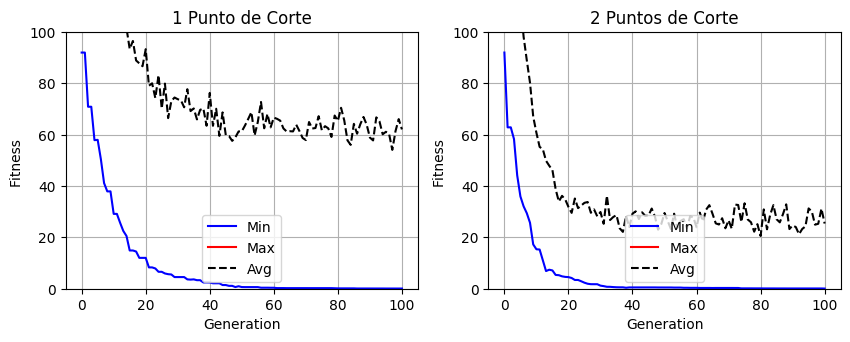

In [ ]:
plot_evolucion([logbook1, logbook2],['1 Punto de Corte', '2 Puntos de Corte'])

De estas gráficas podemos sacar dos importantes conclusiones comparativas. La primera esta en relación con la evolución del mínimo absoluto en cada una de las generaciones. Si nos fijamos en la evolución azul de cada una de las gráficas observamos que el álgoritmo con dos puntos de corte coverge con mayor rapidez hacia su mínimo (*gen 30*) mientras que con un punto de corte tarda algo mas (*gen 50*) esto lo que nos dice es que en el caso de querer un resultado aproximado que no requiera mucha precisión sino velocidad sería más efectivo emplear dos puntos de cruce en lugar de uno, ya que no solo consigue un mejor resultado, sino que también lo consigue más rápido.

Otro enfoque tiene relación con el valor de la media poblacional (*Avg*) si nos fijamos en la evolución de la línea recta en cada una de las gráficas esta refleja el valor medio de los valores en cada una de las generaciones. De esta manera, la media del algoritmo con dos puntos de corte está considerablemente más baja que con un punto de corte, esto lo que nos indica es que el segundo algoritmo posee más elementos cercanos al mínimo que el primero, y que por tanto, al alargar el número de generaciones tendrá un mejor rendimiento en cuanto a la explotación.

De esta manera concluimos que el algoritmo que aplica dos puntos de corte es mejor que el que aplica un punto de corte. Esto lo deducimos a partir de que obtiene un mejor resultado aproximado, lo consigue mas rápido, y al alargar el número de generaciones su explotación será mejor, así como sus resultados.

####**6.2 Pruebas realizadas**

A la hora de encontrar el mejor algoritmo para resolver nuestro problema es esencial realizar pruebas heurísticas correctas para determinar los parámetros adecuados. Para ello lo primero que tenemos en cuenta son las probabilidades de cruce y mutación. Aplicando una técnica de aproximación a los maximos acercandonos a aquellos valores que nos dan un fitness mayor. Para ello se compieza con un paso mas amplio y se prosigue a pasos mas pequeños en la dirección donde se obtienen mejores resultados.

Una vez habiendo encontrado dichos valores de probabilidades nos quedamos con el mejor modelo para aplicarles cambios en los estilos de cruce, mutación y selección. Realizando el mismo tipo de técnica para la obtencion de los parametros adecuados en cada caso.

Representación algoritmo base:
* Intervalo: [-5.12,5.12]
* Mutación: *Gaussiana - media:0 - desviación:5 - indpb:0.1*
* Selección: *Por torneo de 3 individuos*
* Probabilidad de cruce: *0.5*
* Probabilidad de mutación: *0.2*
* Número de generaciones: *100*

#####Pruebas cruce **1 punto de corte**
  
* Pruebas población **640 individuos**
  * Se probaron las siguientes probabilidades de **cruce**: *0.25,0.5,0.6,0.65,0.7,0.75*. El que mejor resultado obtuvo fue **0.65** con el resultado de **0.406912**
  * Aplicando la probabilidad de cruce de 0.65 buscamos la mejor probabilidad de **mutación** entre las siguientes opciones: *0.1,0.2,0.3,0.5,0.55,0.6*. El que mejor resultado obtuvo fue **0.5** con el valor de **0.290936**

* Pruebas población **1280 individuos**
  * Se probaron las siguientes probabilidades de **cruce**: *0.2,0.25, 0.3,0.5,0.75*. El que mejor resultado obtuvo fue **0.25** con el resultado de **0.227078**
  * Aplicando la probabilidad de cruce de 0.25 buscamos la mejor probabilidad de **mutación** entre las siguientes opciones: *0.1,0.2,0.3,0.4,0.45,0.475,0.5*. El que mejor resultado obtuvo fue **0.47** con el valor de **0.072272**

  **Conclusión**: *El aumento de los individuos aumenta considerablemente el valor de fitness óptimo encontrado debido a una mayor representación de las soluciones candidatas en cada generación. En los dos casos se obtienen valores diferentes de cruce, pero similares en mutación. La probabilidad de cruce esta asociada a la exploración de nuestro algoritmo, cuando se usan 640 individuos, la representacion de estos sobre todo el espacio es menor que con 1280. De esta manera, al emplear 1280 resultamos tener una suficiente representación inicial del espacio de soluciones candidatas como para no requerir una gran exploración, al contrario de lo que pasa si tenemos 640 individuos. Por otro lado la probabilidad de mutación es decentemente elevada en ambos casos, esto es debido a que nuestra función tiene una gran cantidad de picos a diferentes alturas y para identificar cual llega mas bajo debemos acercarnos bastante a su minimo (explotarlo)*

#####Pruebas cruce **2 puntos de corte**
  
* Pruebas población **640 individuos**
  * Se probaron las siguientes probabilidades de **cruce**: *0.25,0.5,0.6,0.65,0.7,0.75*. El que mejor resultado obtuvo fue **0.75** con el resultado de **0.3181**
  * Aplicando la probabilidad de cruce de 0.75 buscamos la mejor probabilidad de **mutación** entre las siguientes opciones: *0.1,0.15,0.2,0.25,0.3,*. El que mejor resultado obtuvo fue **0.2** con el valor de **0.3181**

* Pruebas población **1280 individuos**
  * Se probaron las siguientes probabilidades de **cruce**: *0.25,0.5,0.725,0.75,0.775*. El que mejor resultado obtuvo fue **0.65** con el resultado de **0.063076**
  * Aplicando la probabilidad de cruce de 0.65 buscamos la mejor probabilidad de **mutación** entre las siguientes opciones: *0.1,0.15,0.2,0.25,0.3,*. El que mejor resultado obtuvo fue **0.2** con el valor de **0.063076**

  **Conclusión**: *El aumento de los individuos aumenta considerablemente el valor de fitness óptimo encontrado debido a una mayor representación de las soluciones candidatas en cada generación. Esta vez en ambos casos se obtienen valores muy parecidos en probabilidad de mutación y de cruce. En contraste con cruce con un punto de corte, dos puntos de corte producen un aumento en la explotación y una disminucion en la exploración. De esta manera, buscando el equilibrio óptimo, las probabilidades de cruce aumentan, sobre todo con 1280 individuos, buscando aumentar la exploración de nuevo. Por otro lado, la probabilidad de mutación se ve disminuida a niveles normales debido a que se debe bajar el nivel de explotación para no atascarse en maximos locales.*

Se puede observar que los algoritmos anteriores no obtienen un resultado muy exacto en cuanto a llegar al óptimo se refiere. Sin embargo, con una ampliación de épocas si que llegan a acercarse mucho más a partir de las 600 generaciones. Este valor es bastante excesivo, por lo que deberemos realizar cambios sobre el estilo de cruce, mutación y selección buscando acelerar este proceso. Como los dos mejores modelos obtienen resultados muy parecidos se aplicaran los cambios a ambos. Estos modelos son:

Modelo 1

* Intervalo: [-5.12,5.12]
* Población: *1280 individuos*
* Cruce: *un punto de corte*
* Mutación: *Gaussiana - media:0 - desviación:5 - indpb:0.1*
* Selección: *Por torneo de 3 individuos*
* Probabilidad de cruce: *0.25*
* Probabilidad de mutación: *0.47*
* Número de generaciones: *100*

Modelo 2

* Intervalo: [-5.12,5.12]
* Población: *1280 individuos*
* Cruce: *dos puntos de corte*
* Mutación: *Gaussiana - media:0 - desviación:5 - indpb:0.1*
* Selección: *Por torneo de 3 individuos*
* Probabilidad de cruce: *0.65*
* Probabilidad de mutación: *0.2*
* Número de generaciones: *100*

#####Pruebas mutación **Flip Bit**
* Se prueba la mutación Flip Bit con los valores de indpb: *0.05,0.1,0.15,0.2*.El que mejor resultado obtuvo fue **0.3** empleando la representación del **modelo 1** con el resultado de **0** en la **generación 4**

  **Conclusión**: *La mutación Flip Bit nos da una gran ventaja en cuanto a la explotación y exploración dentro de nuestra población. Como se expuso con anterioridad, esta mutación cambia los bits uno a uno permitiendo asi una gran capacidad de explorar el espacio de soluciones, superar los máximos y mínimos locales, y preservar una adecuada diversidad genética. De esta forma, esta mutación considera muchas posibles buenas soluciones candidatas en un corto número de generaciones, sobre todo ideal para funciones objetivo las cuales tengan muchos picos.*

##### Pruebas extra
Las siguientes pruebas fueron evaluadas aunque no se obtuvieron resultados de mejora:
* Cruce: *Simulated Binary, Blend*
* Mutación:*Permutación*
* Selección: *Ruleta sesgada, ranking y elitista*